#    AV Janata Hack - Credit Card Payment Default Prediction Hackathon
link dataset: https://www.kaggle.com/reverie5/av-janata-hack-payment-default-prediction?select=train_20D8GL3.csv         

## Ringkasan pada bisnis plan

1. Sesuai data yang tersedia, 22% pelanggan akan gagal bayar bulan depan (dikurangi dari 78% non default). Ini adalah jumlah pelanggan gagal bayar yang sangat tinggi. Dimana menurut LIBOR untuk default rate payment ditentukan kurang dari 2%

## Problem Statement

Memprediksi secara akurat pelanggan mana yang paling mungkin gagal bayar merupakan peluang bisnis yang signifikan bagi semua bank. Dimana kartu kredit merupakan kartu bank yang paling umum di Taiwan, karena memberikan dampak baik pada konsumen dan bank.

Pada dataset ini juga menginformasikan keputusan bank tentang kriteria untuk menyetujui aplikasi kartu kredit dan juga memutuskan batas kredit apa yang harus diberikan.

Kumpulan data ini berisi informasi tentang pembayaran default, faktor demografis, data kredit, riwayat pembayaran, dan laporan tagihan klien kartu kredit di Taiwan dari April 2005 hingga September 2005.

Dengan menggunakan informasi yang diberikan, tim kami akan memprediksi kemungkinan pelanggan gagal bayar di bulan berikutnya.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

print('Numpy version: ', np.__version__)
print('Oandas version: ',pd.__version__)
print('Seaborn version: ',sns.__version__)

Numpy version:  1.19.5
Oandas version:  1.3.5
Seaborn version:  0.11.2


In [ ]:
rcParams['figure.figsize'] = (30,14)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#df_sample_submission_gm6gE0l = pd.read_csv('/content/drive/MyDrive/rakamin/Final_Project/dataset/sample_submission_gm6gE0l.csv')
#df_test_O6kKpvt = pd.read_csv('/content/drive/MyDrive/rakamin/Final_Project/dataset/test_O6kKpvt.csv')
df_train_20D8GL3 = pd.read_csv('/content/drive/MyDrive/rakamin/Final_Project/dataset/train_20D8GL3.csv')

# Informasi Tentang Dataset

## Dataset berisi informasi mengenai pembayaran default, demografis, data kredit, riwayat pembayaran, dan laporan tagihan kartu kredit debitur di salah satu bank di Taiwan dari April 2005 hingga September 2005.

## **Detail kolom**

Terdiri dari 25 variabel:

* `ID`: Unique identifier untuk setiap klien/debitur
* `LIMIT_BAL`: Jumlah kredit yang diberikan dalam NT dollar
* `SEX`: Jenis kelamin (1=laki-laki, 2=perempuan)
* `EDUCATION`: (1=pascasarjana, 2=universitas, 3=SMA, 4=lainnya, 5=tidak diketahui, 6=tidak diketahui)
* `MARRIAGE`: Status pernikahan (1=menikah, 2=lajang, 3=bercerai)
* `AGE`: Usia dalam tahun
* `PAY_0`: Status pembayaran pada bulan September 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* `PAY_2`: Status pembayaran pada Agustus 2005 (skala sama dengan `PAY_0`)
* `PAY_3`: Status pembayaran pada Juli 2005 (skala sama dengan `PAY_0`)
* `PAY_4`: Status pembayaran pada Juni 2005 (skala sama dengan `PAY_0`)
* `PAY_5`: Status pembayaran pada Mei 2005 (skala sama dengan `PAY_0`)
* `PAY_6`: Status pembayaran pada April 2005 (skala sama dengan `PAY_0`)
* `BILL_AMT1`: Jumlah tagihan tagihan pada bulan September 2005 (NT dollar)
* `BILL_AMT2`: Jumlah tagihan tagihan pada bulan Agustus 2005 (NT dollar)
* `BILL_AMT3`: Jumlah tagihan tagihan pada bulan Juli 2005 (NT dollar)
* `BILL_AMT4`: Jumlah tagihan tagihan pada bulan Juni 2005 (NT dollar)
* `BILL_AMT5`: Jumlah tagihan tagihan pada bulan Mei 2005 (NT dollar)
* `BILL_AMT6`: Jumlah tagihan tagihan pada bulan April 2005 (NT dollar)
* `PAY_AMT1`: Jumlah pembayaran sebelumnya di bulan September 2005 (NT dollar)
* `PAY_AMT2`: Jumlah pembayaran sebelumnya di bulan Agustus 2005 (NT dollar)
* `PAY_AMT3`: Jumlah pembayaran sebelumnya di bulan Juli 2005 (NT dollar)
* `PAY_AMT4`: Jumlah pembayaran sebelumnya di bulan Juni 2005 (NT dollar)
* `PAY_AMT5`: Jumlah pembayaran sebelumnya di bulan Mei 2005 (NT dollar)
* `PAY_AMT6`: Jumlah pembayaran sebelumnya di bulan April 2005 (NT dollar)
* `default.payment.next.month`: Pembayaran default di bulan berikutnya (1=yes, 0=no)

# STAGE 1

# No.1 Pengecekan deskripsi statistik data

In [ ]:
df_train_20D8GL3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

In [ ]:
df_train_20D8GL3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

In [ ]:
# informasi general tentang dataframe
df_train_20D8GL3.info()
# LIMIT_BAL = Amount of given credit (NT dollars): It includes both the individual consumer credit and his/her family (supplementary) credit
# MARRIAGE = Marital status
# PAY_0 - PAY_6 = Repayment status start from September to April 2005 (NT dollar)
# BILL_AMT1 - BILL_AMT1  = Amount of bill statement start from September - April 2005 (NT dollar)
# PAY_AMT1 = Amount of previous payment start from September to April 2005 (NT dollar)               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

In [ ]:
df_train_20D8GL3.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
7870,8565,200000,2,3,2,33,-1,-1,-1,0,-1,-1,834,165,6682,16045,4679,280,165,6682,10000,4679,280,0,0
11644,14563,240000,2,2,1,39,4,3,2,2,2,2,47739,46712,45660,48905,47993,52015,0,0,4000,0,5000,2000,1
8154,1352,280000,2,1,1,39,-1,0,-1,-1,-1,-1,7791,5851,430,2041,775,580,1000,430,2041,775,580,1029,1
18699,18235,50000,1,3,2,58,2,0,0,0,0,0,7831,7556,7312,6959,5813,3985,1123,1140,1048,163,135,151,0
9989,2016,390000,2,3,1,38,-2,-2,-2,-2,-1,-1,241,0,0,0,739,0,0,0,0,739,0,0,1


In [ ]:
df_train_20D8GL3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,21000.0,14949.183667,8632.775153,1.0,7508.75,14939.5,22386.75,29998.0
LIMIT_BAL,21000.0,167214.746667,128965.188482,10000.0,50000.00,140000.0,240000.00,800000.0
SEX,21000.0,1.607571,0.488303,1.0,1.00,2.0,2.00,2.0
EDUCATION,21000.0,1.854190,0.791628,0.0,1.00,2.0,2.00,6.0
MARRIAGE,21000.0,1.551714,0.521176,0.0,1.00,2.0,2.00,3.0
AGE,21000.0,35.461619,9.206628,21.0,28.00,34.0,41.00,75.0
PAY_0,21000.0,-0.011190,1.123210,-2.0,-1.00,0.0,0.00,8.0
PAY_2,21000.0,-0.127238,1.198957,-2.0,-1.00,0.0,0.00,8.0
PAY_3,21000.0,-0.164857,1.198624,-2.0,-1.00,0.0,0.00,8.0
PAY_4,21000.0,-0.218190,1.172210,-2.0,-1.00,0.0,0.00,8.0


### Pengamatan;

df_train_20D8GL3.info():

1. Dataset terdiri dari 25 kolom dan 21000 baris. dan tidak terdapat null value.
2. Setiap kolom telah memiliki tipe data yang sesuai, setiap kolom memiliki value berupa numerik dan tipe datanya sudah sesuai yaitu int.
3. Terdapat penamaan kolom yang kurang selaras yaitu setelah kolom `PAY_0` langsung ke `PAY_2`, sementara pada `BILL_AMT` dan `PAY_AMT` diawali dengan 1 bukan 0 dan definisi kolomnya urut sesuai dengan `BILL_AMT` dan `PAY_AMT`.
4. Kolom `ID` akan didrop karena merupakan identifier dari tiap baris yang nilainya unik dan tidak dapat memberikan informasi apa-apa dalam analisis.
 

df_train_20D8GL3.sample(5):

* Berdasarkan nilai summary dari dataset, dapat diamati bahwa:
    1. Terdapat nilai yang belum terdefinisi dalam dataset kolom `PAY_0 - PAY_6`, yaitu nilai 0 dan -2.
    2. Terdapat nilai yang belum terdefinisi dalam dataset kolom `MARRIAGE`, yaitu nilai 0.
    3. Terdapat nilai yang belum terdefinisi dalam dataset kolom `EDUCATION`, yaitu nilai 0 
    4. Terdapat nilai minus pada nilai min untuk kolom BILL_AMT1 - BILL_AMT6, dimana seharusnya untuk jumlah bill statement tidak ada yang bernilai negatif. (kemungkinan nilai minus memiliki arti lain seperti kelebihan bayar)
    5. Kolom `default_payment_next_month` ternyata bernilai boolean/binary
    6. Kolom `SEX, EDUCATION, MARRIAGE, PAY_0 - PAY_6`, `default_payment_next_month` tampaknya merupakan data kategorikal yang direpresentasikan menggunakan numerik.

df_train_20D8GL3.describe().transpose():

1. Hanya kolom `AGE` yang tampak sudah cukup simetrik distribusinya (mean dan median tak berbeda jauh)
2. Kolom `LIMIT_BAL, BILL_AMT1 - BILL_AMT6, PAY_AMT1 - PAY_AMT6` sepertinya right skewed.
    * Kolom `LIMIT_BAL, PAY_AMT1 - PAY_AMT6` memiliki nilai mean > median dan selisih percentil 75 dengan max sangat jauh.
    * `BILL_AMT1 - BILL_AMT6` memiliki nilai mean > median.


## Usulan improvement pada data yang diberikan
1. Nama kolom PAY_0 sebenarnya harus PAY_1. Kami akan mengganti namanya.
2. Kolom PAY_1 hingga PAY_6 dikatakan memuat "Payment delay in months". Misalnya, PAY_6 mewakili "the repayment status in April, 2005", dan nilai 8 di kolom itu berarti "payment delay for eight months", sedangkan nilai -1 di kolom itu berarti "pay duly". Kami menemukan bahwa banyak nilai dalam PAY_1 hingga PAY_6 adalah nol dan -2. dan data yang belum menentukan arti apa pun untuk 0 dan -2 di kolom ini.



## Beberapa pemahaman umum tentang siklus penagihan kartu kredit 
1. **"No Payment"** menunjukkan bahwa pelanggan menolak untuk melakukan pembayaran terhadap tagihan.
2. **"Minimum Payment"** mengartikan sekitar 5-10% dari total jumlah tagihan yang harus dibayar pelanggan dalam periode kredit yang berlaku untuk pelanggan agar kartu tetap aktif dan terkini.
3. **"Full Payment"** merupakan pembayaran penuh terhadap total jumlah tagihan yang harus dibayar pelanggan dalam periode kredit yang berlaku.
4. **"Part Payment"** mewakili sebagian kecil dari pembayaran terhadap jumlah total tagihan yang dapat diputuskan untuk dibayar oleh pelanggan.
5. **"Part Payment"** tersebut dapat kurang dari **"Minimum Payment"**, yang diartikan sama dengan minimum payment atau lebih dari minimum payment tetapi kurang dari total amount.
6. Semua **"Pending Payment"** tersebut kemudian dibawa ke tagihan berikutnya, dengan tambahan biaya keuangan dan bunga yang berlaku pada jumlah yang tertunda tersebut.
7. Pelanggan dapat terus membayar **"Part Payment"** selama berbulan-bulan dan terus mengumpulkan **"Total Pending Amount"** sampai **"Credit Balance Limit"**-nya tercapai, dalam proses menimbulkan tambahan biaya bulanan keuangan dan bunga.


In [ ]:
# rename kolom PAY_0
df_train_20D8GL3 = df_train_20D8GL3.rename(columns={'PAY_0': 'PAY_1'})

In [ ]:
# pengelompokan kolom berdasarkan jenisnya
categoricals = ['SEX', 'EDUCATION', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'MARRIAGE', 'default_payment_next_month']
numericals = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
# karena value dari kolom kategorikal berupa numerik dan tidak ingin merubah tipe data di dataframe asli, maka dibuatlah dataframe baru
df_cats = df_train_20D8GL3[categoricals].copy() 
df_cats = df_cats.astype(str)
df_cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   SEX                         21000 non-null  object
 1   EDUCATION                   21000 non-null  object
 2   PAY_1                       21000 non-null  object
 3   PAY_2                       21000 non-null  object
 4   PAY_3                       21000 non-null  object
 5   PAY_4                       21000 non-null  object
 6   PAY_5                       21000 non-null  object
 7   PAY_6                       21000 non-null  object
 8   MARRIAGE                    21000 non-null  object
 9   default_payment_next_month  21000 non-null  object
dtypes: object(10)
memory usage: 1.6+ MB


In [ ]:
df_cats.describe()

,SEX,EDUCATION,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,MARRIAGE,default_payment_next_month
count,21000,21000,21000,21000,21000,21000,21000,21000,21000,21000
unique,2,7,11,11,11,10,10,10,4,2
top,2,2,0,0,0,0,0,0,2,0
freq,12759,9789,10324,11043,11056,11542,11852,11450,11184,16355


1. Data dinominasi (proporsi lebih dari 50% dari jumlah baris data) oleh perempuan (kolom `SEX`) dan orang dengan status single (kolom `MARRIAGE`)
2. Kategori pada `PAY_0 - PAY_6` terdiri dari 11 kategori dengan didominasi oleh kategori yang sama yaitu kategori 0
3. Kolom `default_payment_next_month` yang merupakan label pada dataset sedikit menunjukkan class imbalance dengan persentase kategori 0 (not default) sebesar 78%


In [ ]:
for col in categoricals:
    print(f'''Value count kolom {col}:''')
    print(df_train_20D8GL3[col].value_counts())
    print()

Value count kolom SEX:
2    12759
1     8241
Name: SEX, dtype: int64

Value count kolom EDUCATION:
2    9789
1    7415
3    3467
5     200
4      85
6      34
0      10
Name: EDUCATION, dtype: int64

Value count kolom PAY_1:
 0    10324
-1     3937
 1     2608
-2     1923
 2     1883
 3      231
 4       47
 5       19
 8       11
 6        9
 7        8
Name: PAY_1, dtype: int64

Value count kolom PAY_2:
 0    11043
-1     4174
 2     2776
-2     2643
 3      229
 4       69
 1       23
 5       21
 7       11
 6       10
 8        1
Name: PAY_2, dtype: int64

Value count kolom PAY_3:
 0    11056
-1     4125
-2     2868
 2     2670
 3      173
 4       55
 7       22
 5       14
 6       13
 8        2
 1        2
Name: PAY_3, dtype: int64

Value count kolom PAY_4:
 0    11542
-1     3949
-2     3047
 2     2208
 3      135
 4       51
 7       43
 5       19
 6        4
 8        2
Name: PAY_4, dtype: int64

Value count kolom PAY_5:
 0    11852
-1     3840
-2     3193
 2     1869
 3 

### Pengamatan:

Jumlah data dalam kategori yang belum terdefinisi (yang kemudian akan dijadikan pertimbangan apakah akan didrop atau akan di redefinisi berdasarkan isi datanya):
* Pada kolom `MARRIAGE` nilai 0 ada 36. Nilai 0 belum terdefinisi
* Pada kolom `EDUCATION` nilai 0 ada 10. Nilai 0 belum terdefinisi
* Pada kolom `PAY_0` nilai 0 ada 10324, dan nilai -2 ada 1923. nilai 0 dan -2 belum terdefinisi
* Pada kolom `PAY_2` nilai 0 ada 11043, dan nilai -2 ada 2643. nilai 0 dan -2 belum terdefinisi
* Pada kolom `PAY_3` nilai 0 ada 11056, dan nilai -2 ada 2868. 
* Pada kolom `PAY_4` nilai 0 ada 11542, dan nilai -2 ada 3047. 
* Pada kolom `PAY_5` nilai 0 ada 11852, dan nilai -2 ada 3193. 
* Pada kolom `PAY_6` nilai 0 ada 11450, dan nilai -2 ada 3427. 


Dominasi data:
* Kategori pada PAY_0 - PAY_6 cukup banyak (>8)
* Kolom default_payment_next_month yang merupakan label pada dataset menunjukkan class imbalance dengan persentase kategori 0 (not default) sebesar 78%.
* Data dinominasi (proporsi lebih dari 50% dari jumlah baris data) oleh perempuan (kolom SEX) dan orang dengn status single (kolom MARRIAGE).

# No.2 Pengecekan distribusi setiap features terhadap variabel target

### Barplot untuk melihat perbandingan distribusi data per kategori untuk setiap kolomnya

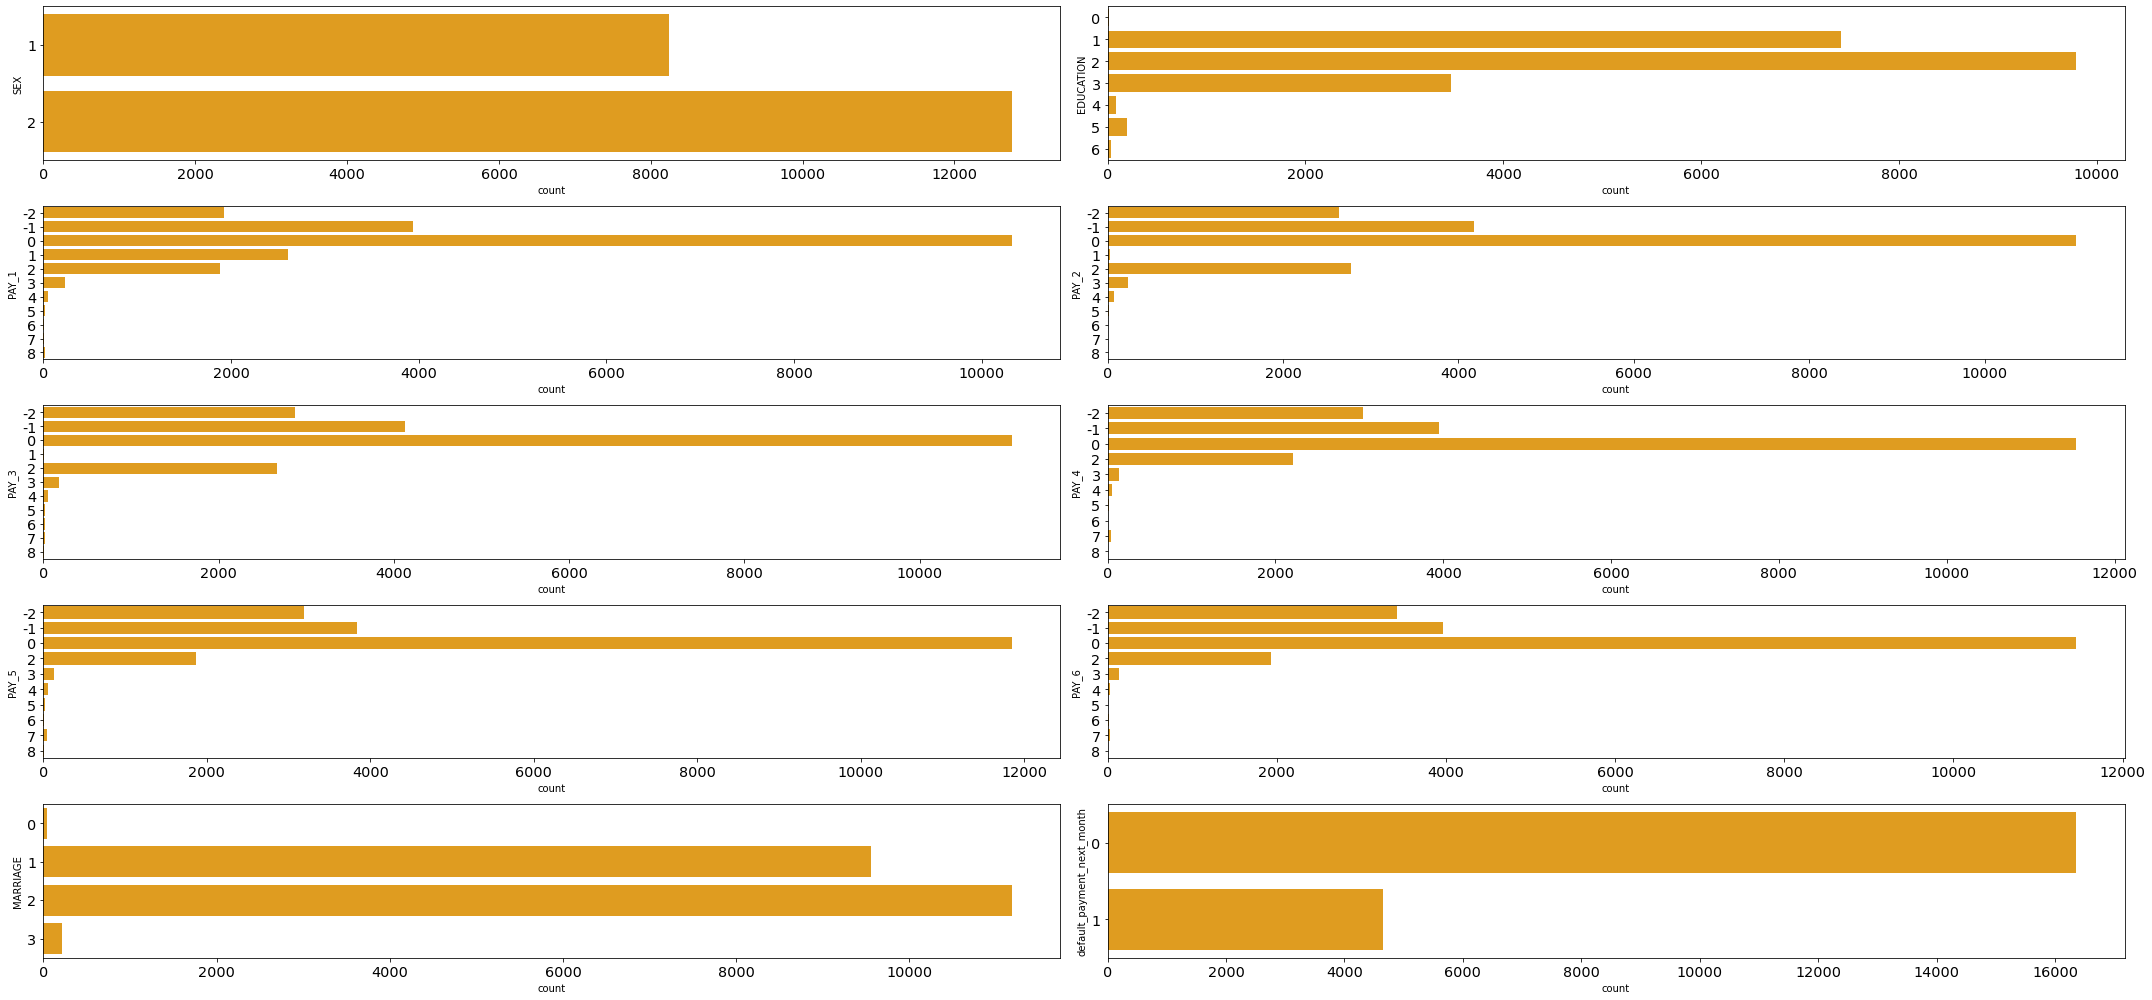

In [ ]:
for i in range(0, len(categoricals)):
    plt.subplot(5, 2, i+1)
    sns.countplot(y = df_train_20D8GL3[categoricals[i]], color='orange', orient='v')
    plt.tight_layout()

Pengamatan:
1. SEX didominasi oleh kategori 2 (female)
2. EDUCATION didominasi oleh kategori 2 (university)
3. PAY_0 - PAY_6 didominasi oleh kategori 0 (tidak terdefinisi di dataset) dan terdapat jumlah kategori yang cukup banyak
4. MARRIAGE didominasi oleh kategori 2 (single) dan disusul oleh kategori 1 (married)
5. default_payment_next_month didominasi oleh 0 (not default), tampak bahwa terdapat class imbalance pada label.


### Boxplot berguna untuk melihat outlier pada data numerik


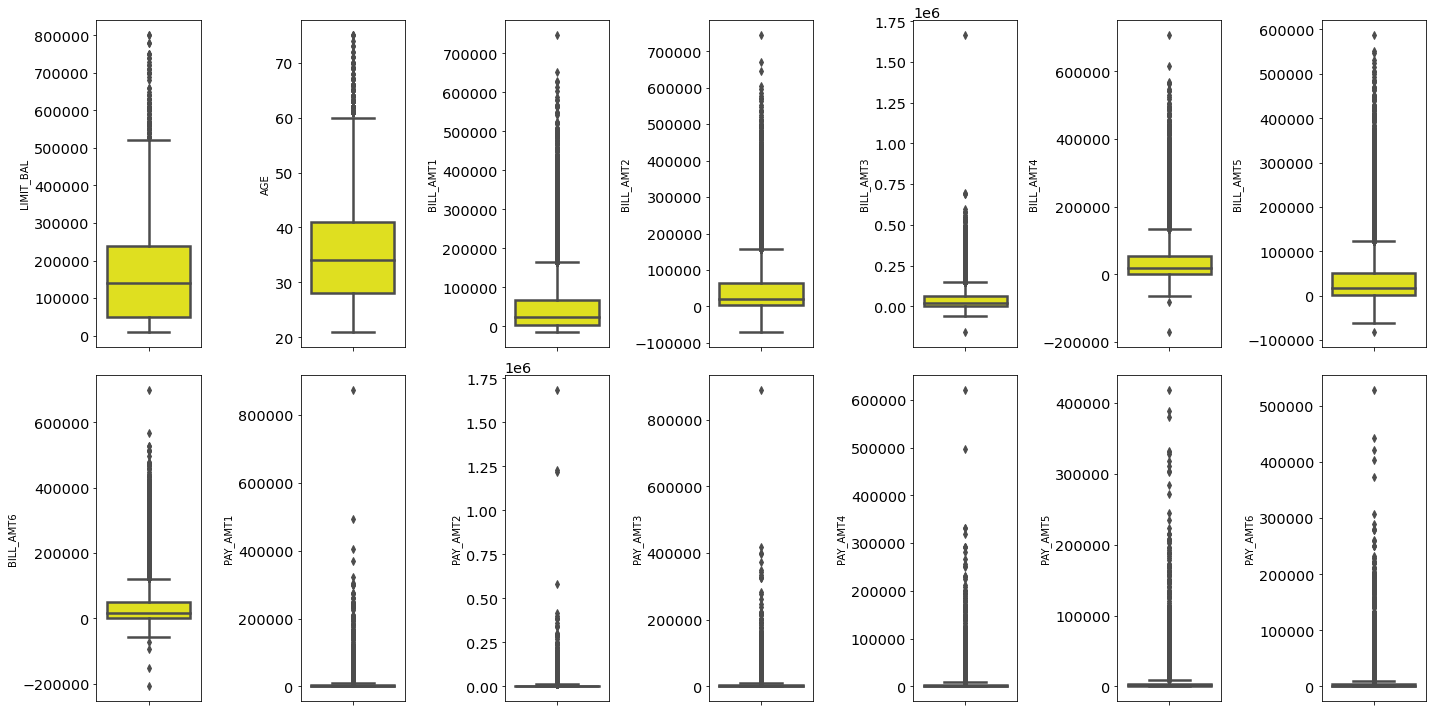

In [ ]:
features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(20, 10))
for i in range(0, len(features)):
    plt.subplot(2, len(features)/2, i+1)
    sns.boxplot(y=df_train_20D8GL3[features[i]], color='yellow', orient='v')
    plt.tight_layout()

Pengamatan:

1. Tampak disetiap numerikal data pada dataset memiliki outlier semua. (untuk penanganan yang dilakukan yaitu dengan memfilter outlier dengan menggunakan z score, kemudian akan dilakukan pengecekan distribusi dari data setelah difilter dengan z score)
2. `BILL_AMT3 - BILL_AMT6` memiliki outlier dikedua sisinya baik di bagian positif atau negatif. (seperti dijelaskan diatas untuk `BILL_AMT` memang terdapat keanehan dari datanya yaitu ada cukup banyak data yang bernilai negatif. Oleh karena itu, kami akan melakukan eksplorasi lebih lanjut untuk penanganan data tersebut)

### KernelDestinyEstimationplot untuk melihat persebaran datanya, apakah sudah normal atau condong kekanan atau kekiri

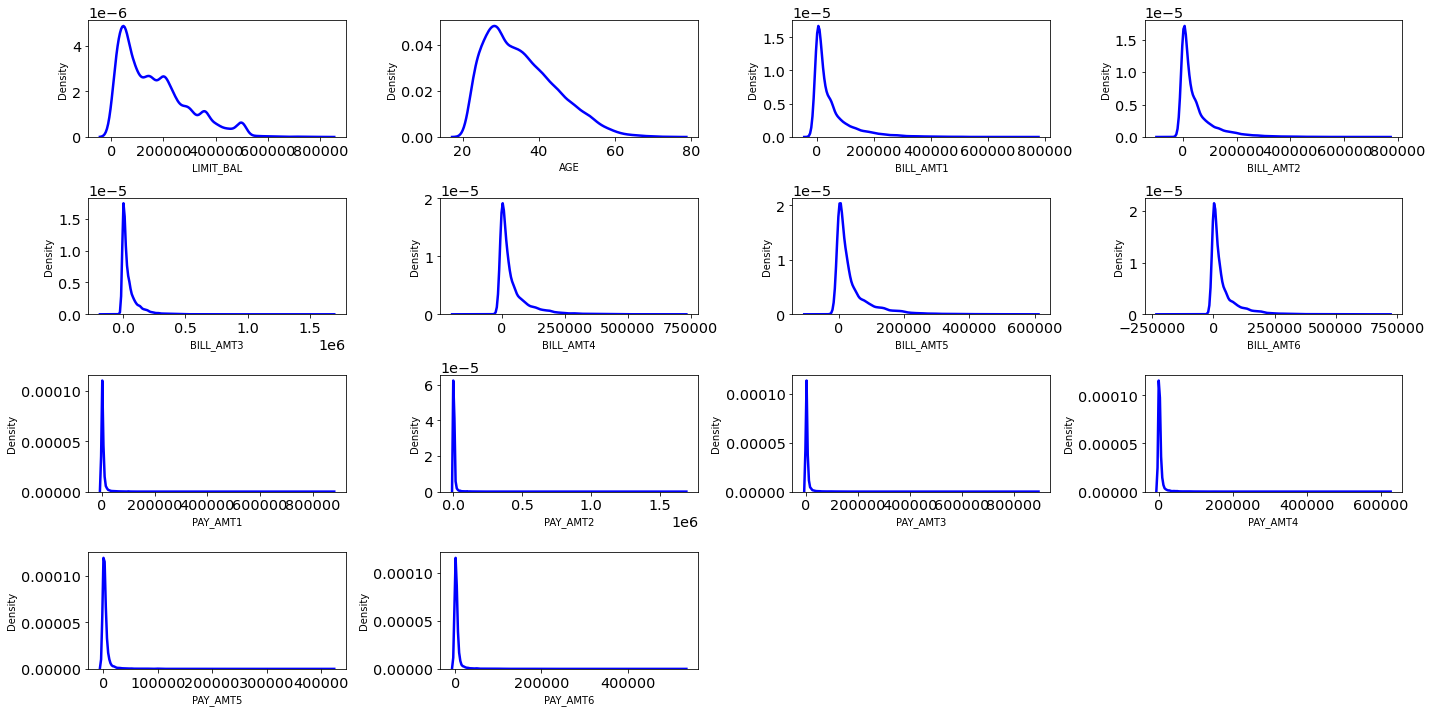

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(0, len(features)):
    plt.subplot(4, len(features)/3, i+1)
    sns.kdeplot(x=df_train_20D8GL3[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

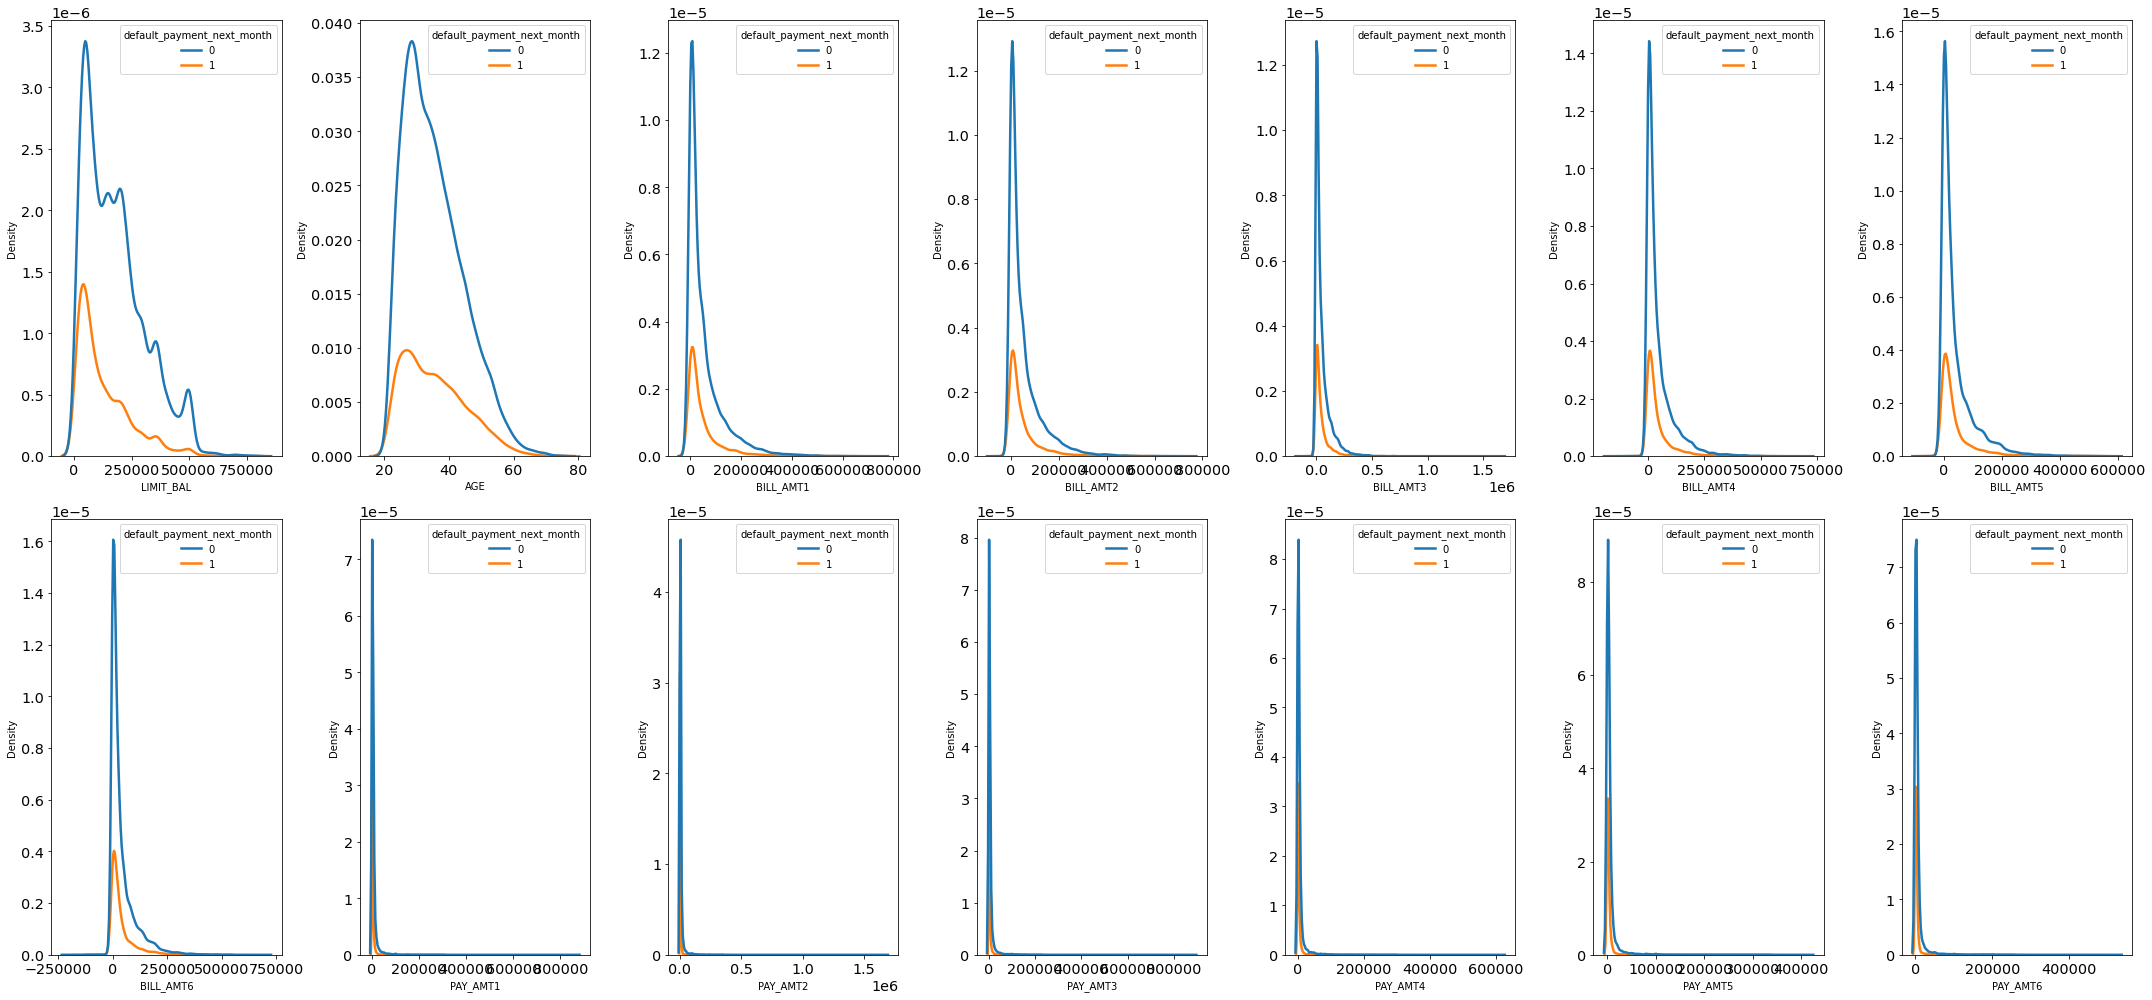

In [ ]:
for i in range(0, len(features)):
    plt.subplot(2, len(features)/2, i+1)
    sns.kdeplot(x=df_train_20D8GL3[features[i]], hue='default_payment_next_month', data=df_train_20D8GL3)
    plt.tight_layout()

### Pengamatan:

1. Berdasarkan visualisasi diatas, semua numerical data pada dataset tampak skew ke kanan semua 
(penanganannya mungkin akan dilakukan log transformation untuk mengatasi distribusi yang skew tersebut setelah dilakukan filtrasi outlier)
2. Hanya kolom AGE yang tampak sudah cukup simetrik distribusinya (mean dan median tak berbeda jauh)

### Violin plot untuk memastikan kembali, atau hasil kombinasi boxplot dan kernel density estimation plot

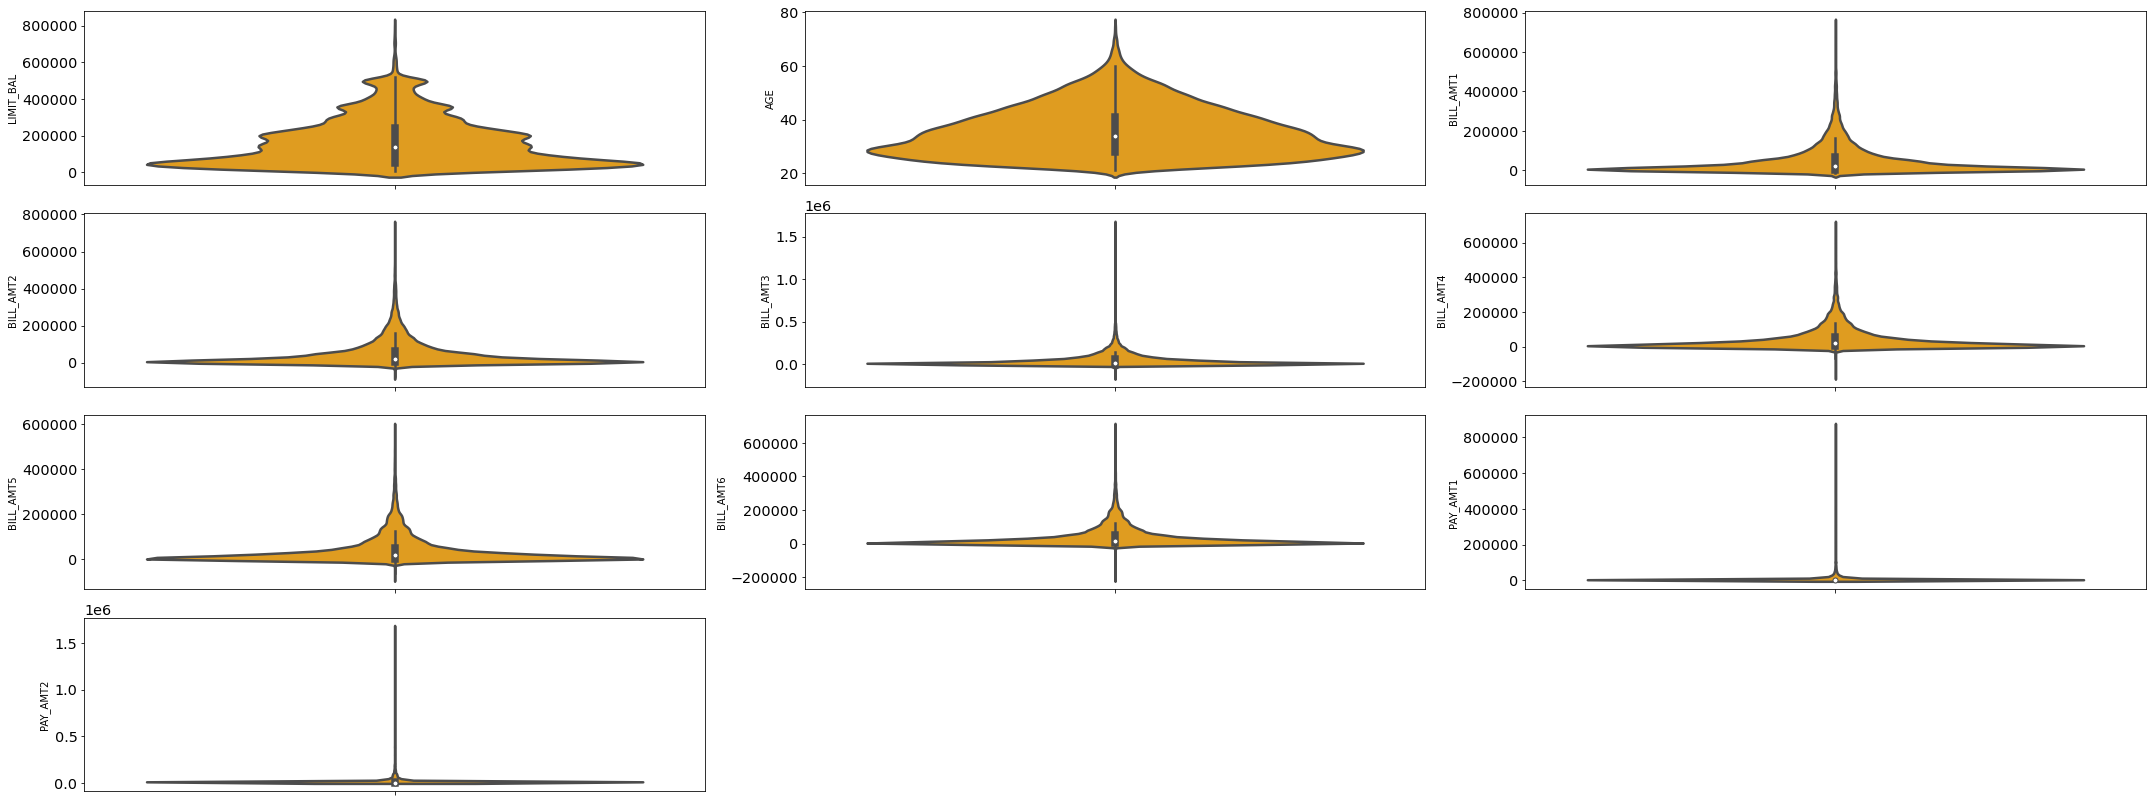

In [ ]:
for i in range(0, len(categoricals)):
    plt.subplot(5, 3, i+1)
    sns.violinplot(y = df_train_20D8GL3[features[i]], color='orange', orient='v')
    plt.tight_layout()

# No.3 Pengecekan korelasi data

In [ ]:
df_train_20D8GL3.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
ID,1.000000,0.029309,0.023360,0.035009,-0.025129,0.017725,-0.029347,-0.011643,-0.019846,-0.004922,-0.021758,-0.019846,0.014660,0.015419,0.018707,0.038737,0.015078,0.015758,0.007428,0.004978,0.043774,0.012707,0.003834,0.001453,-0.016701
LIMIT_BAL,0.029309,1.000000,0.029683,-0.216762,-0.110451,0.143206,-0.272059,-0.297323,-0.290059,-0.269652,-0.253399,-0.235601,0.290539,0.283654,0.288947,0.297446,0.297377,0.291518,0.194995,0.176589,0.206638,0.199472,0.221325,0.215073,-0.159163
SEX,0.023360,0.029683,1.000000,0.011012,-0.033930,-0.092907,-0.061232,-0.072602,-0.064406,-0.061242,-0.055920,-0.045045,-0.031595,-0.030287,-0.023328,-0.017430,-0.014278,-0.013546,0.003907,0.000398,-0.003920,0.000042,0.002165,0.003759,-0.037634
EDUCATION,0.035009,-0.216762,0.011012,1.000000,-0.143085,0.172253,0.105815,0.119132,0.110223,0.103607,0.094702,0.080033,0.027826,0.022834,0.015698,0.002318,-0.005243,-0.006436,-0.042164,-0.032573,-0.045854,-0.041620,-0.035620,-0.031098,0.021347
MARRIAGE,-0.025129,-0.110451,-0.033930,-0.143085,1.000000,-0.414239,0.029420,0.032403,0.043988,0.042245,0.044779,0.043123,-0.026133,-0.023962,-0.027713,-0.024648,-0.026143,-0.020930,-0.002227,-0.006634,0.000018,-0.014061,-0.003375,-0.005555,-0.016888
AGE,0.017725,0.143206,-0.092907,0.172253,-0.414239,1.000000,-0.043313,-0.055090,-0.058891,-0.057324,-0.061018,-0.050668,0.054186,0.053819,0.053439,0.049968,0.048377,0.047465,0.025439,0.022501,0.025842,0.026427,0.024296,0.016846,0.006664
PAY_1,-0.029347,-0.272059,-0.061232,0.105815,0.029420,-0.043313,1.000000,0.669158,0.573421,0.540895,0.506958,0.472545,0.183120,0.184325,0.173635,0.175132,0.176809,0.172138,-0.085340,-0.070403,-0.079509,-0.065830,-0.061725,-0.065042,0.325851
PAY_2,-0.011643,-0.297323,-0.072602,0.119132,0.032403,-0.055090,0.669158,1.000000,0.768036,0.662055,0.621775,0.573462,0.230246,0.229404,0.217190,0.218108,0.217404,0.215069,-0.083156,-0.060032,-0.064262,-0.051836,-0.041990,-0.042252,0.263546
PAY_3,-0.019846,-0.290059,-0.064406,0.110223,0.043988,-0.058891,0.573421,0.768036,1.000000,0.780378,0.692843,0.635996,0.205603,0.233152,0.222866,0.224166,0.222599,0.220174,-0.004458,-0.063249,-0.058944,-0.050562,-0.034179,-0.039050,0.235930
PAY_4,-0.004922,-0.269652,-0.061242,0.103607,0.042245,-0.057324,0.540895,0.662055,0.780378,1.000000,0.826037,0.720236,0.199066,0.222600,0.240683,0.242503,0.240128,0.236392,-0.014070,-0.001616,-0.073125,-0.046960,-0.032112,-0.031699,0.220079


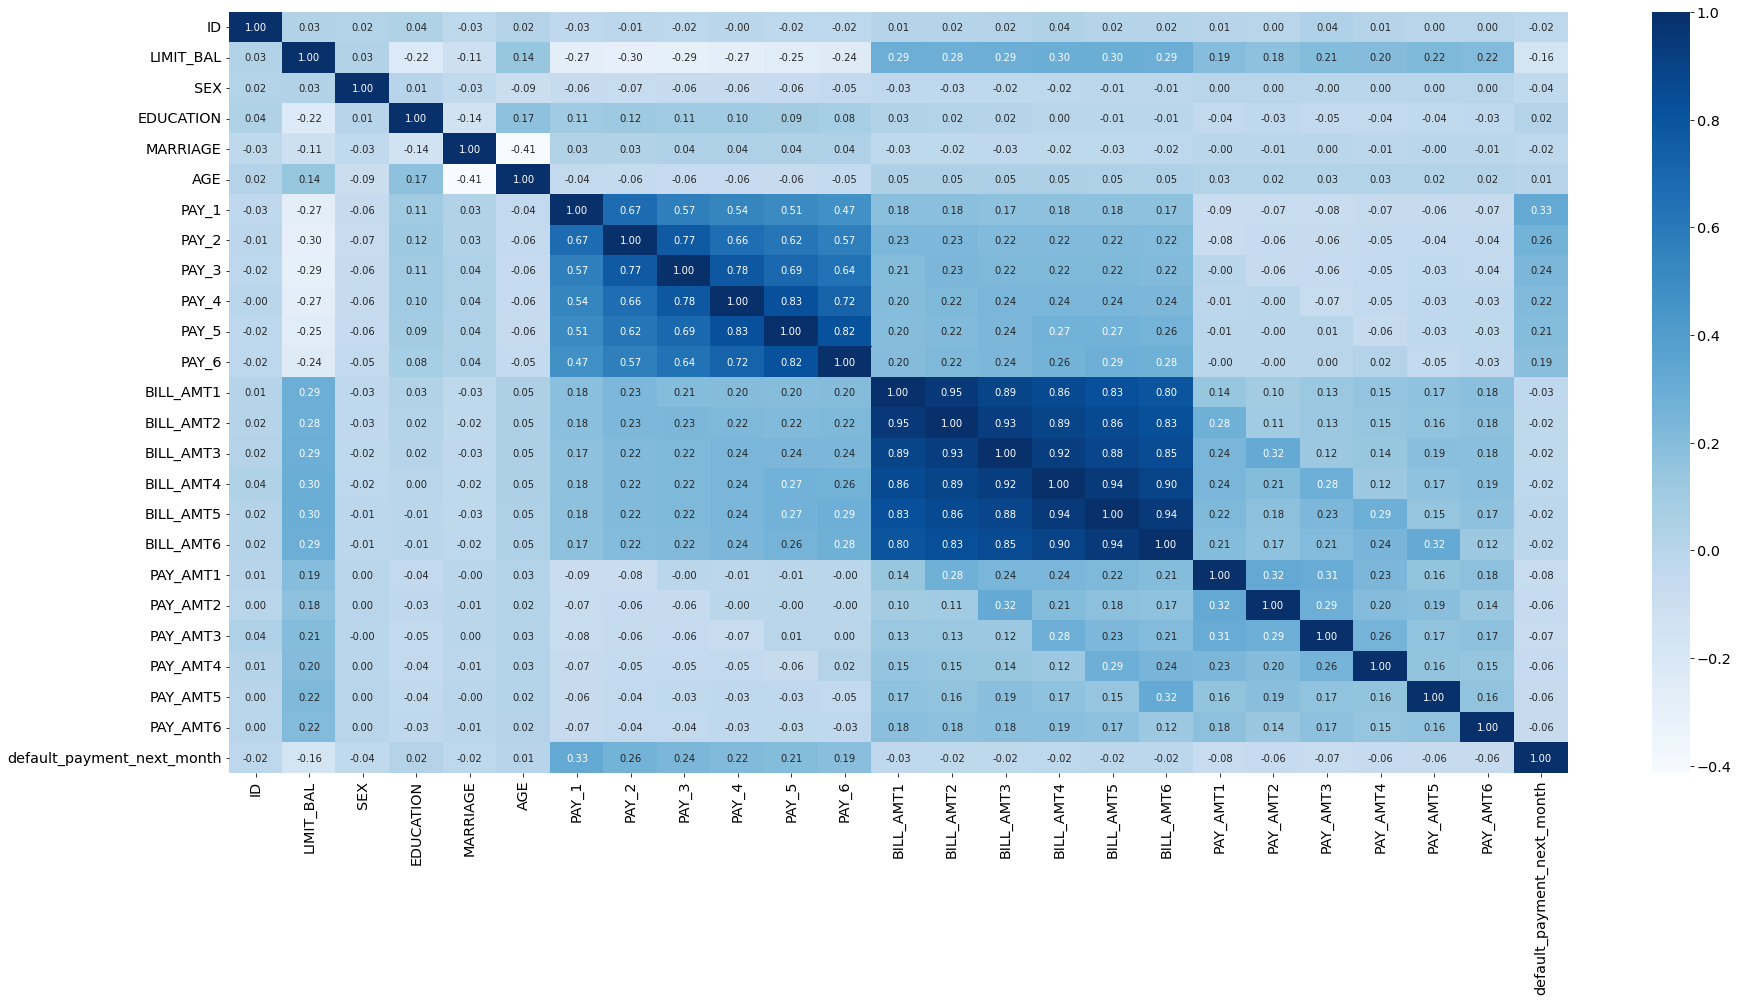

In [ ]:
sns.heatmap(df_train_20D8GL3.corr(), cmap='Blues', annot=True, fmt='.2f')

### Pengamatan:

1. Target default_payment_next_month 
    * memiliki korelasi positif lemah dengan `LIMIT_BAL, Pay_0, Pay_1, Pay_2, Pay_3, Pay_4, Pay_5, Pay_6` yang selanjutkan akan digunakan pada model.
    * tidak memiliki korelasi positif cukup kuat terhadap feature apapun.
2. korelasi antar-feature
    * Terdapat banyak sekali feature yang saling berkolerasi positif cukup kuat (`BILL_AMT` dengan `BILL_AMT` dan `PAY_AMT` dengan `PAY_AMT`) dan ada juga featur yang berkorelasi negatif lemah (`AGE - MARRIAGE`)

# No.4 Penjelasan langkah-langkah yang digunakan untuk meningkatkan performa model

1. Terdapat penamaan kolom yang kurang selaras yaitu setelah kolom `PAY_0` langsung ke `PAY_2`, sementara pada `BILL_AMT` dan `PAY_AMT` diawali dengan 1 bukan 0 dan definisi kolomnya urut sesuai defngan `BILL_AMT` dan `PAY_AMT`.
    * Kita akan merename `PAY_0` menjadi `PAY_1`

2. Kolom `ID` merupakan identifier dari tiap baris yang nilainya unik dan tidak dapat memberikan informasi apa-apa dalam analisis.
    * Akan didrop

3. Terdapat nilai-nilai yang belum terdefinisi pada kolom `EDUCATION, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, MARRIAGE`
    * akan didrop atau di redefinisi tergantung jumlah data yang tidak terdefinisi tersebut.

3. Terdapat nilai minus pada nilai min untuk kolom `BILL_AMT1 - BILL_AMT6`, dimana seharusnya untuk jumlah bill statement tidak ada yang bernilai negatif.
    * Perlu eksplorasi lebih dalam mengenai BILL_AMT yang minus ini karena jika didrop akan mengurangi jumlah data cukup banyak, kemungkinan BILL_AMT bernilai negatif karena kelebihan bayar tagihan pada bulan sebelumnya..

4. Tampak disetiap numerikal data pada dataset memiliki outlier semua pada visualisasi Boxplot.
    * Untuk penanganan yang dilakukan yaitu dengan memfilter outlier dengan menggunakan z score, kemudian akan dilakukan pengecekan distribusi dari data setelah difilter dengan z score

5. Berdasarkan visualisasi KernelDestinyEstimationplot, semua numerical data pada dataset tampak skew ke kanan semua 
    * Penanganannya mungkin akan dilakukan log transformation untuk mengatasi distribusi yang skew tersebut setelah dilakukan filtrasi outlier)

# No.5 Insight yang relevan terhadap masalah

### Target variabel default

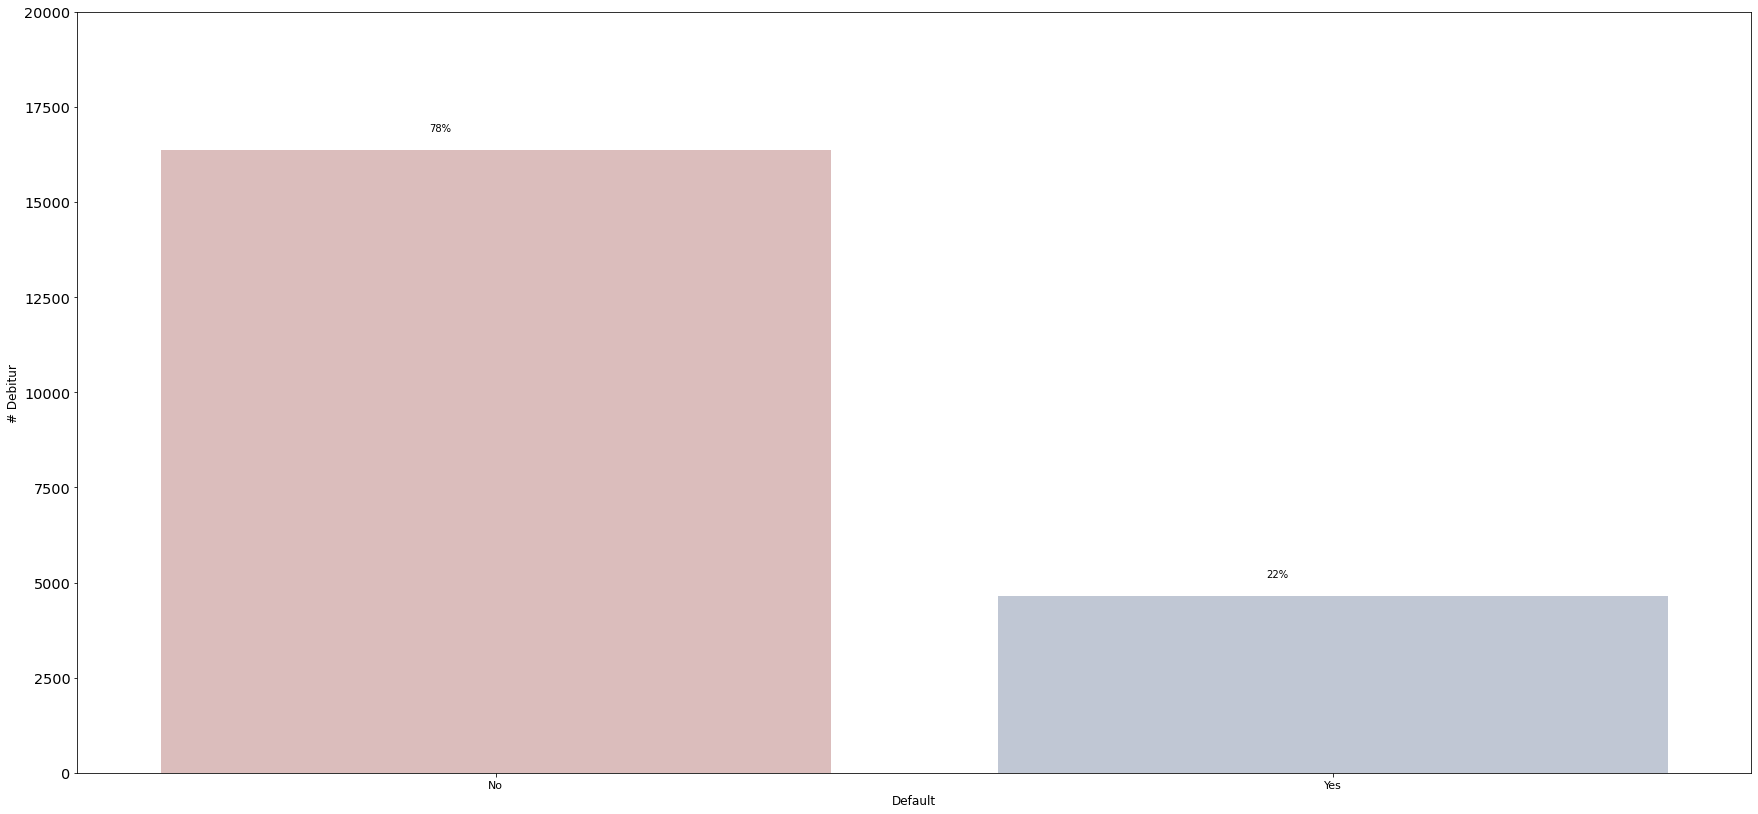

In [ ]:
ax = sns.countplot(x="default_payment_next_month", data=df_train_20D8GL3, palette="vlag_r")

plt.xlabel("Default", fontsize= 12)
plt.ylabel("# Debitur", fontsize= 12)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 11)
plt.ylim(0,20000)

for p in ax.patches:
    ax.annotate('{:.0f}%'.format(100 * p.get_height() / 21000), (p.get_x()+0.32, p.get_height()+500))
    
plt.show()

### Pengamatan:
1. Berdasarkan data, terdapat 22% debitur yang akan gagal membayar di bulan depan

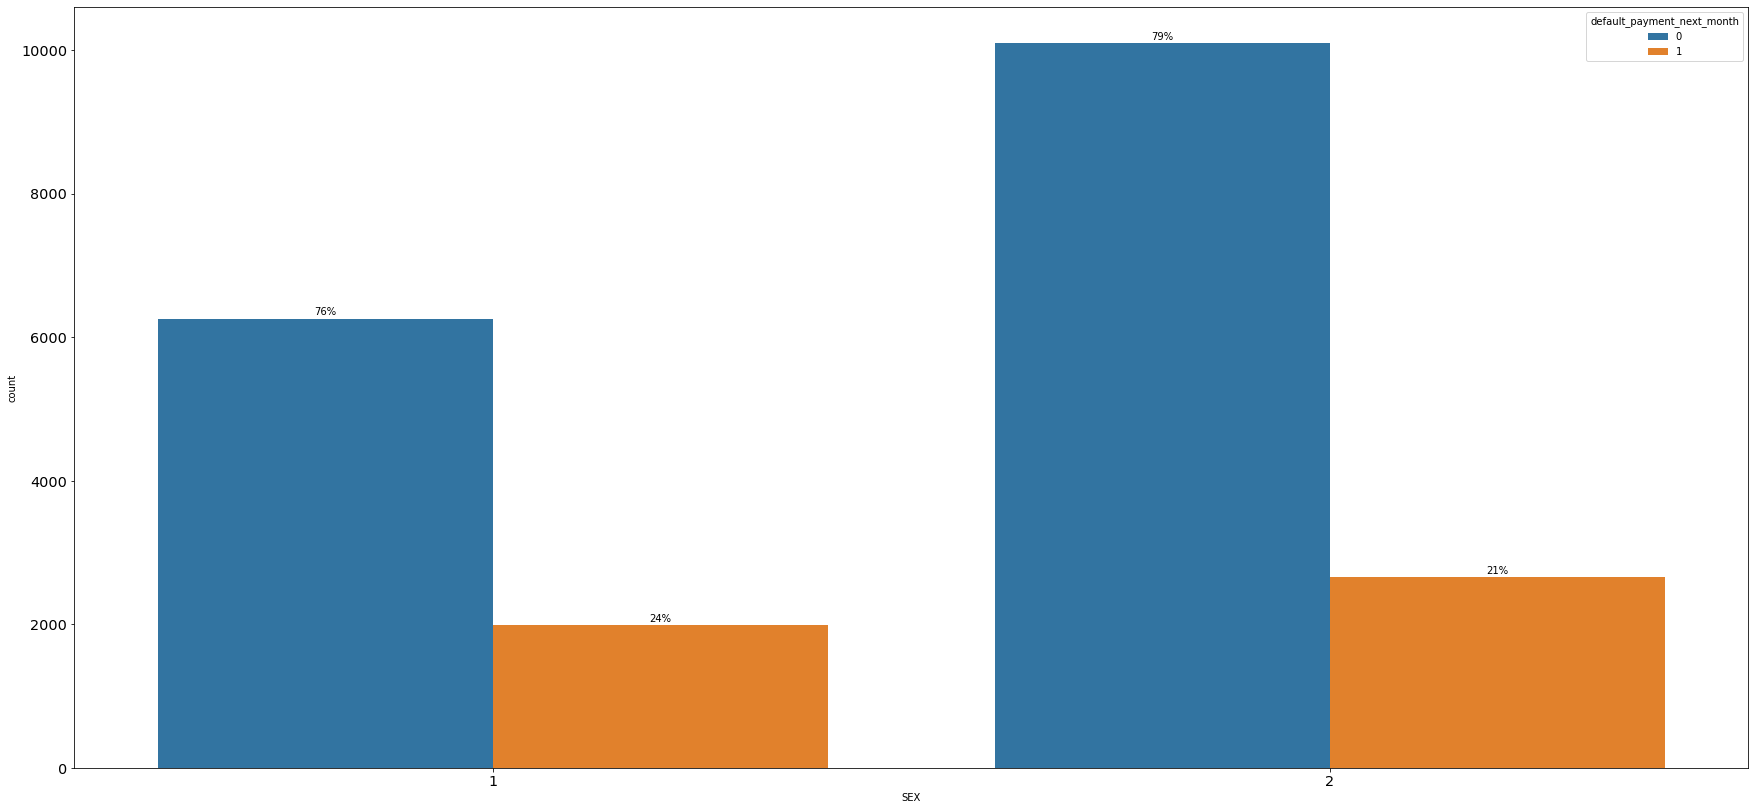

In [ ]:
df_1 = df_train_20D8GL3.groupby(['SEX','default_payment_next_month']).agg({'ID':'nunique'}).reset_index()
temp = df_train_20D8GL3.groupby(['SEX']).agg({'ID':'nunique'}).reset_index()

df_1 = df_1.merge(temp, on='SEX')
df_1.columns = ['SEX', 'default_payment_next_month', 'count', 'total']
# plt.subplot(1, 3, 1)
splot = sns.barplot(x = 'SEX', y = 'count', data = df_1, hue='default_payment_next_month')

i = 0 # indexing untuk mendapatkan nilai total
for p in splot.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height() / df_1['total'][i]) 
    i += 2 # penambahan index untuk print SEX yang 0
    if (i>3): # untuk annotate untuk print SEX yang 1
        i = 1
    x = p.get_x() + p.get_width()/2 
    y = p.get_height() + 50
    splot.annotate(percentage, (x, y),ha='center', color='#000')

### Pengamatan:
1.  SEX perempuan (2) mendominasi dataset
2.  Persentase debitur yang default dibulan depan paling banyak pada laki-laki yaitu sebesar 24% dari jumlah laki-laki cenderung akan default dibanding kan perempuan yang hanya sebesar  21% dari jumlah keseluruhan perempuan.
    

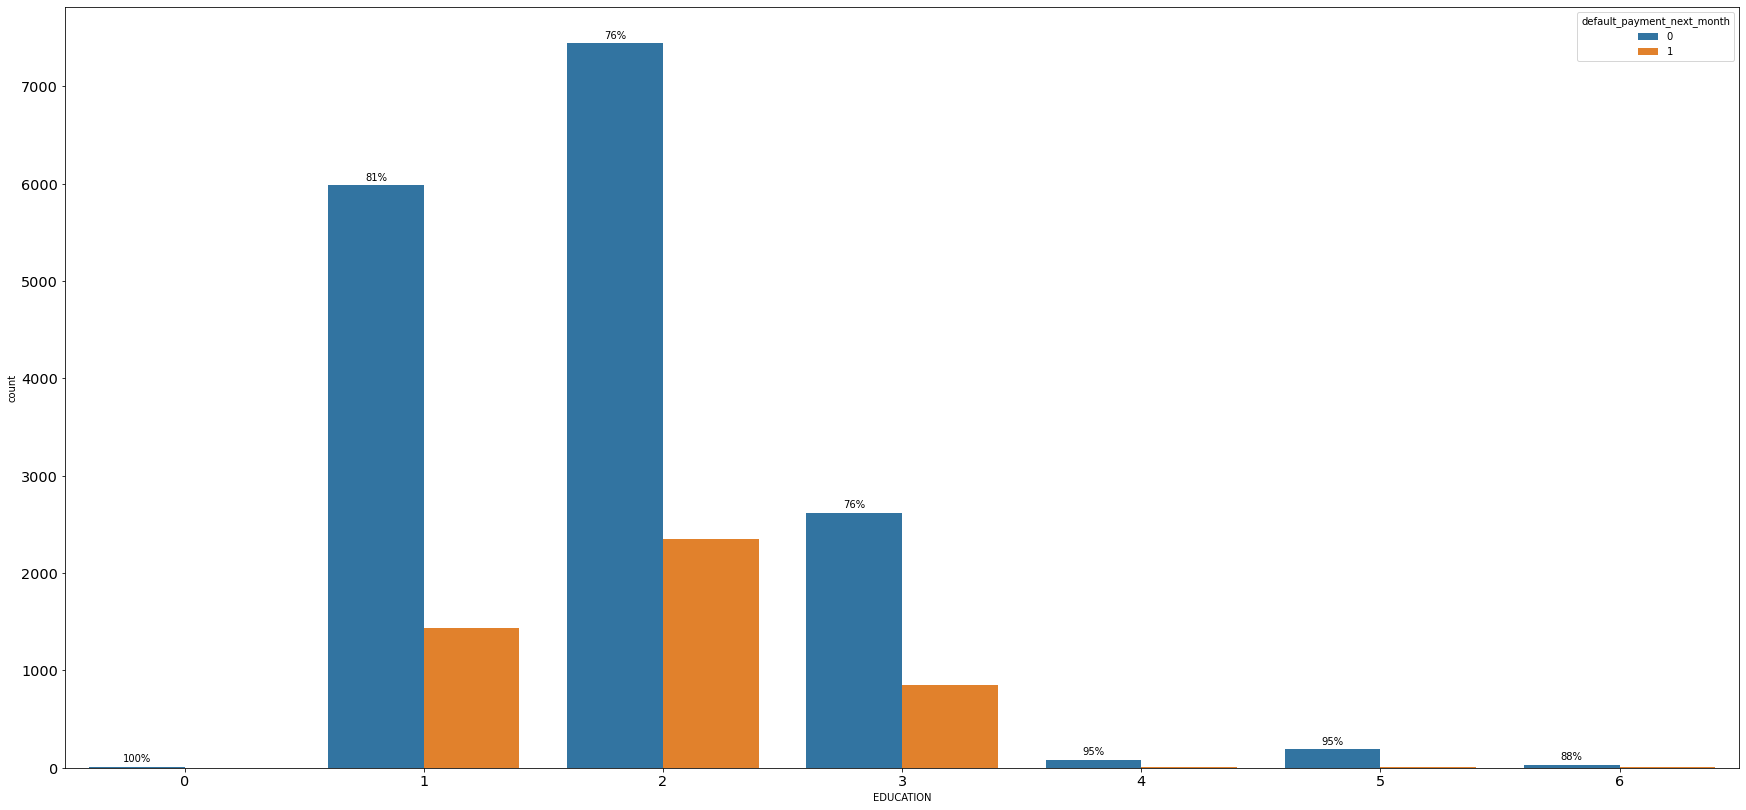

In [ ]:
df_2 = df_train_20D8GL3.groupby(['EDUCATION','default_payment_next_month']).agg({'ID':'nunique'}).reset_index()

temp = df_train_20D8GL3.groupby(['EDUCATION']).agg({'ID':'nunique'}).reset_index()

df_2 = df_2.merge(temp, on='EDUCATION')
df_2.columns = ['EDUCATION', 'default_payment_next_month', 'count', 'total']

df_2['percentage'] = 100*df_2['count']/df_2['total']

splot = sns.barplot(x = 'EDUCATION', y = 'count', data = df_2, hue='default_payment_next_month')

i = 0
for p in splot.patches:
    x = p.get_x() + p.get_width()/2 
    y = p.get_height() + 50
    percentage = '{:.0f}%'.format(df_2['percentage'][i])
    if i == 0:
      splot.annotate(percentage, (x, y),ha='center', color='#000')
      i += 1
    else:
      if (i<10): 
        i += 2
      else: 
        splot.annotate(percentage, (x, y),ha='center', color='#000')
        break
      splot.annotate(percentage, (x, y),ha='center', color='#000')
      
    

### Pengamatan:

1. debitur didominasi oleh orang dengan education university (2) dan disusul dengan education graduate school (1)
2. Namun jumlah debitur yang default paling banyak ditemukan pada debitur dengan status single (2) dan divorced (3) yaitu sekitar 24% dari total debitur dalam kategori tersebut

# No.6 Insight untuk menentukan rekomendasi bisnis

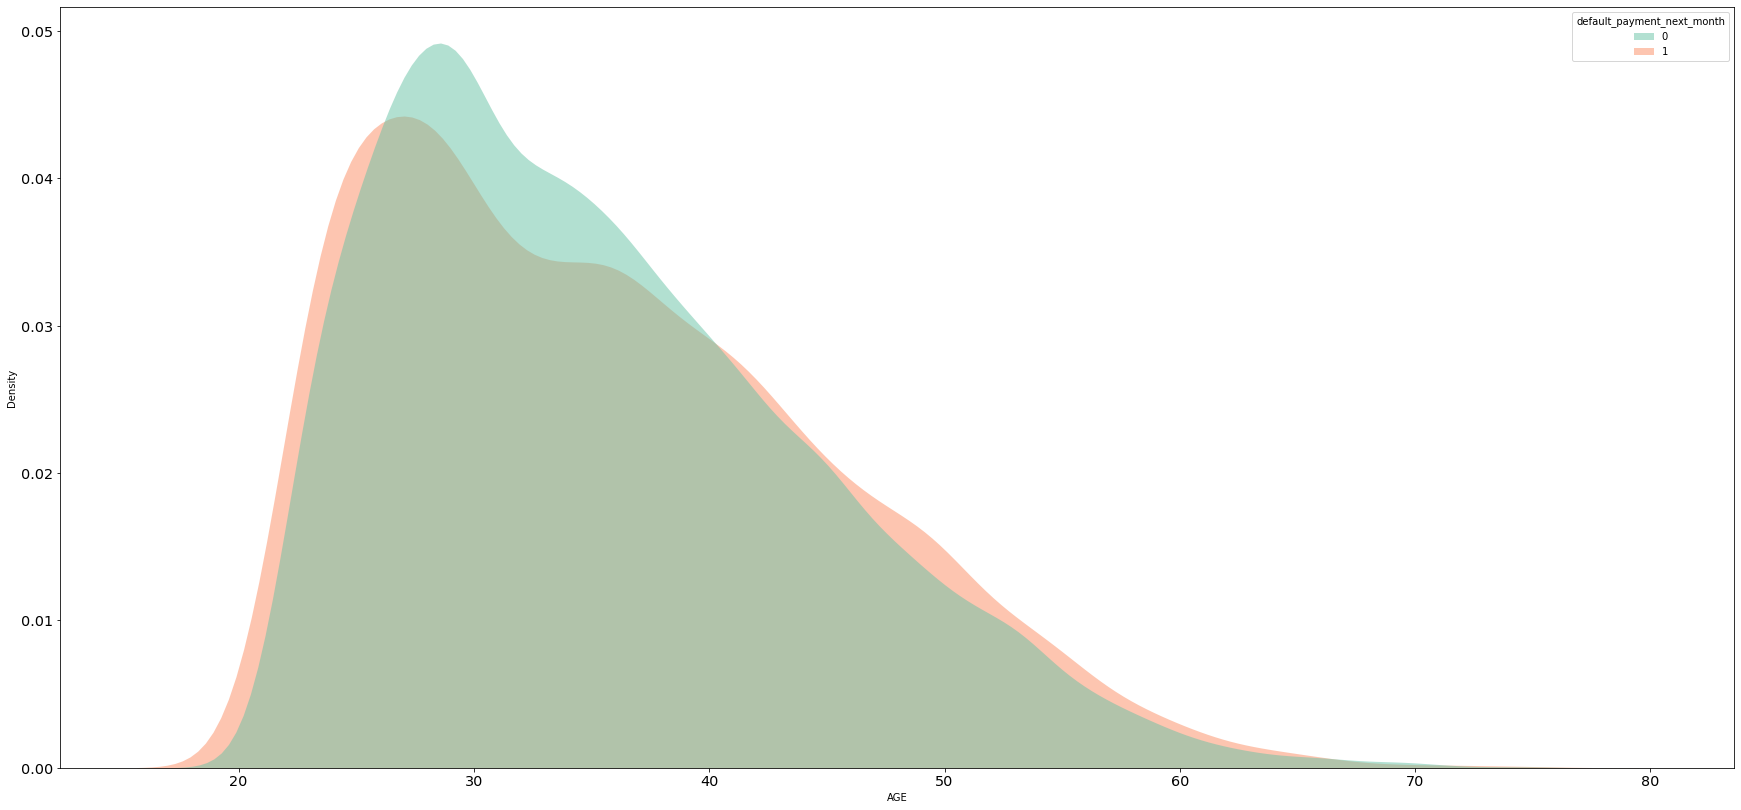

In [ ]:
sns.kdeplot(
   data=df_train_20D8GL3, x="AGE", hue="default_payment_next_month",
   fill=True, common_norm=False, palette="Set2",
   alpha=.5, linewidth=0,
)

### Pengamatan
1. Usia debitur yang mendominasi baik default maupun tidak adalah sama yaitu berada diusia antara 25 tahun sampai 30 tahun

### Rekomendasi bisnis:
* perlu dilakukan screening yang lebih ketat mengenai kelayakan calon customer

# No.7 Visualisasi dari insight-insight yang ada

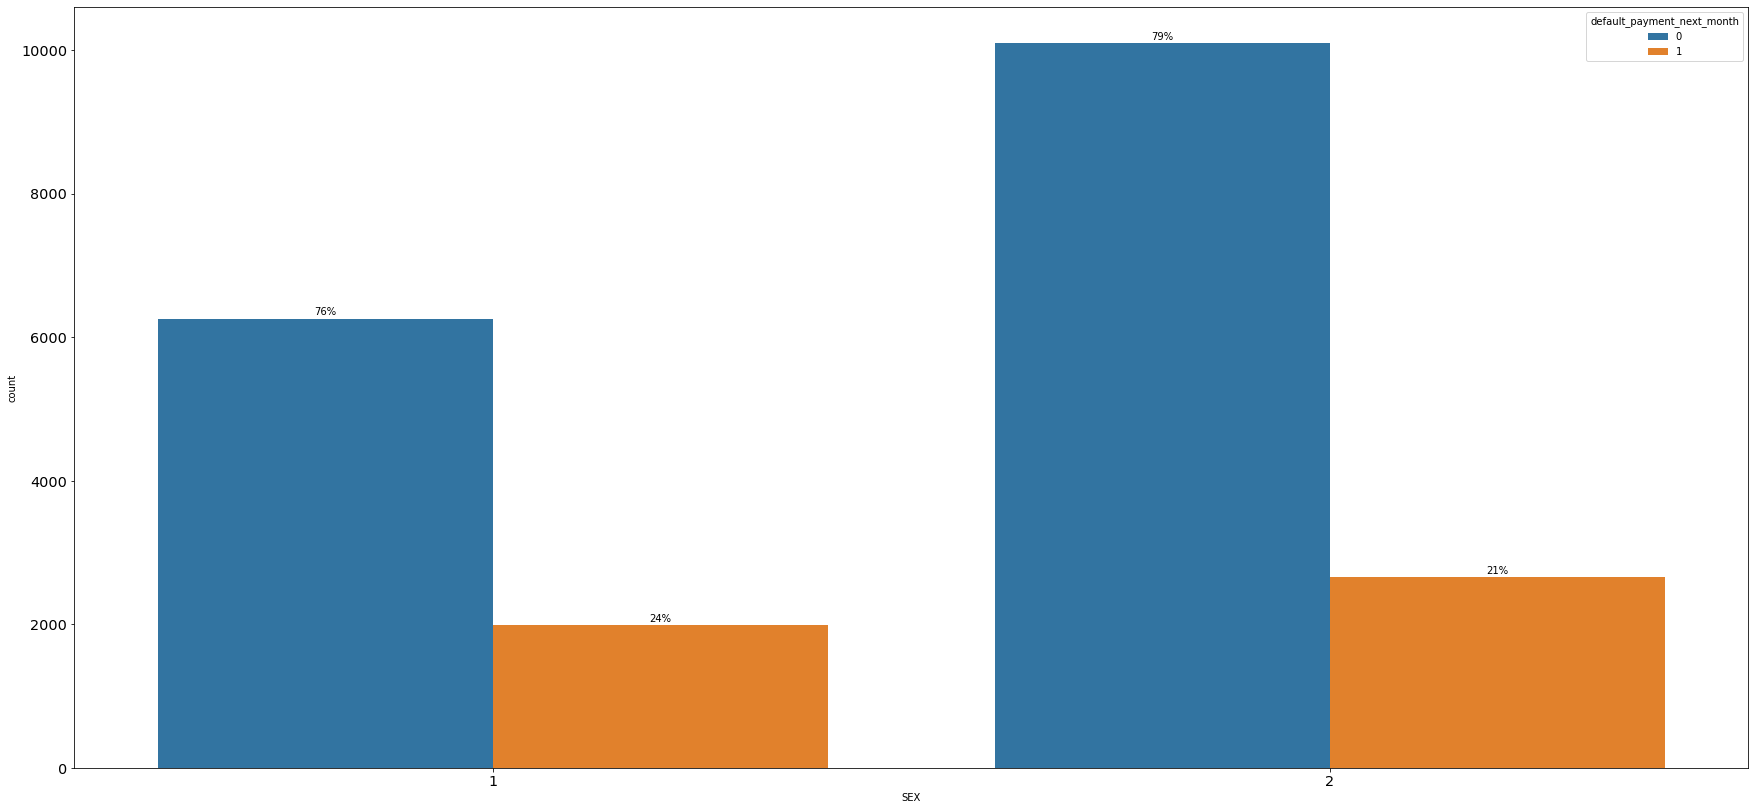

In [ ]:
df_1 = df_train_20D8GL3.groupby(['SEX','default_payment_next_month']).agg({'ID':'nunique'}).reset_index()
temp = df_train_20D8GL3.groupby(['SEX']).agg({'ID':'nunique'}).reset_index()

df_1 = df_1.merge(temp, on='SEX')
df_1.columns = ['SEX', 'default_payment_next_month', 'count', 'total']
# plt.subplot(1, 3, 1)
splot = sns.barplot(x = 'SEX', y = 'count', data = df_1, hue='default_payment_next_month')

i = 0 # indexing untuk mendapatkan nilai total
for p in splot.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height() / df_1['total'][i]) 
    i += 2 # penambahan index untuk print SEX yang 0
    if (i>3): # untuk annotate untuk print SEX yang 1
        i = 1
    x = p.get_x() + p.get_width()/2 
    y = p.get_height() + 50
    splot.annotate(percentage, (x, y),ha='center', color='#000')

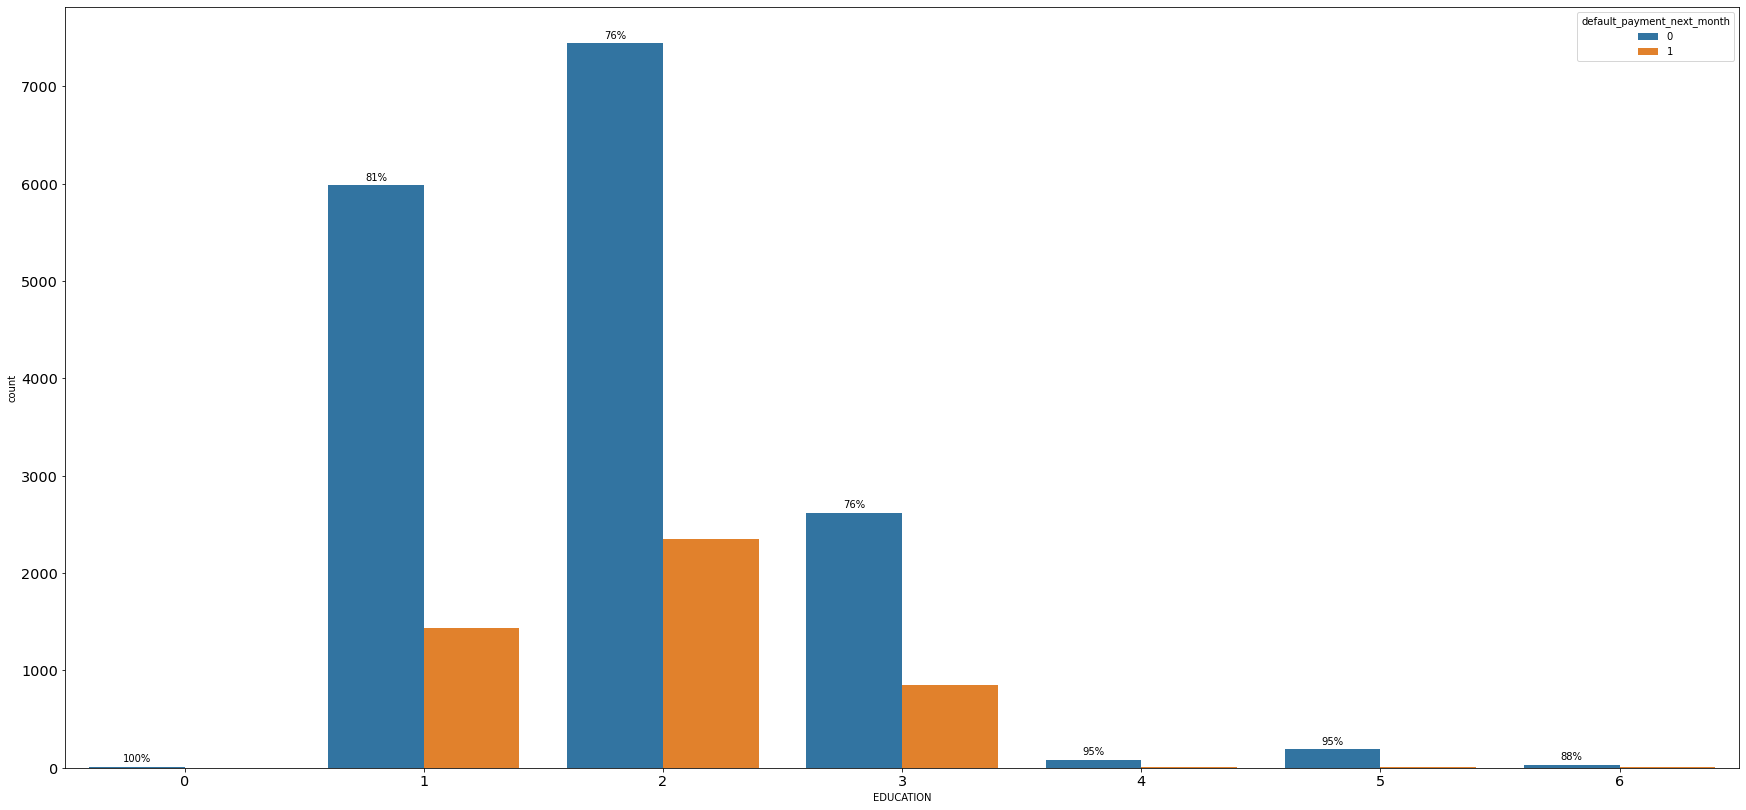

In [ ]:
df_2 = df_train_20D8GL3.groupby(['EDUCATION','default_payment_next_month']).agg({'ID':'nunique'}).reset_index()

temp = df_train_20D8GL3.groupby(['EDUCATION']).agg({'ID':'nunique'}).reset_index()

df_2 = df_2.merge(temp, on='EDUCATION')
df_2.columns = ['EDUCATION', 'default_payment_next_month', 'count', 'total']

df_2['percentage'] = 100*df_2['count']/df_2['total']

splot = sns.barplot(x = 'EDUCATION', y = 'count', data = df_2, hue='default_payment_next_month')

i = 0
for p in splot.patches:
    x = p.get_x() + p.get_width()/2 
    y = p.get_height() + 50
    percentage = '{:.0f}%'.format(df_2['percentage'][i])
    if i == 0:
      splot.annotate(percentage, (x, y),ha='center', color='#000')
      i += 1
    else:
      if (i<10): 
        i += 2
      else: 
        splot.annotate(percentage, (x, y),ha='center', color='#000')
        break
      splot.annotate(percentage, (x, y),ha='center', color='#000')
      
    

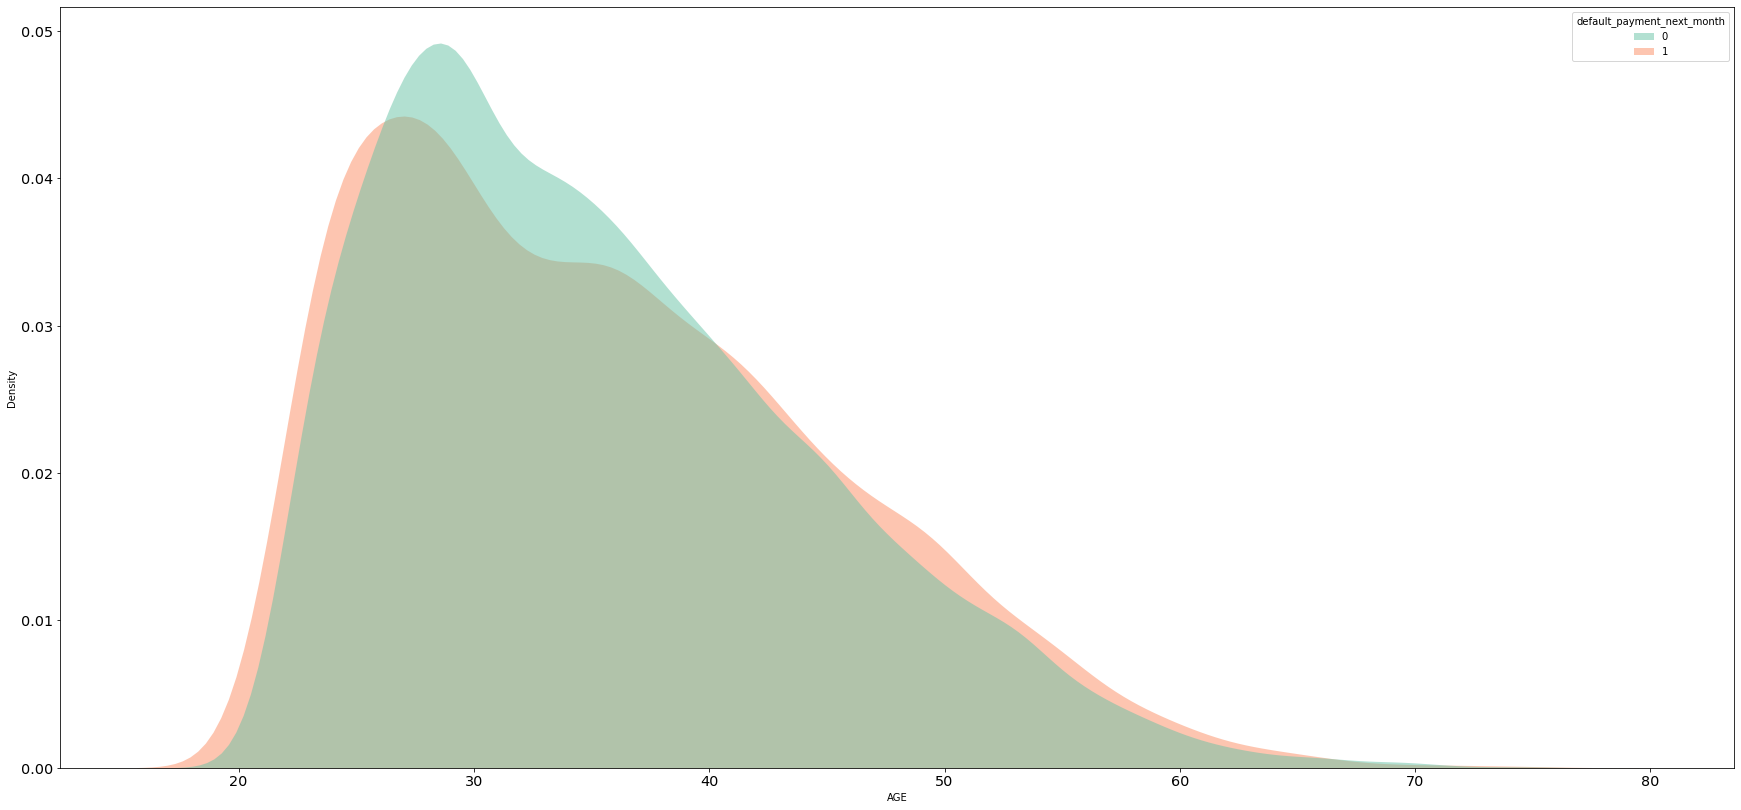

In [ ]:
sns.kdeplot(
   data=df_train_20D8GL3, x="AGE", hue="default_payment_next_month",
   fill=True, common_norm=False, palette="Set2",
   alpha=.5, linewidth=0,
)

--------------------------------------------------------------------------------
## **EDA Conclusion**

## Ringkasan pada bisnis plan

A. Sesuai data yang tersedia, 22% pelanggan akan gagal bayar bulan depan (dikurangi dari 78% non default). Ini adalah jumlah pelanggan gagal bayar yang sangat tinggi. Dimana menurut LIBOR untuk default rate payment ditentukan kurang dari 2%
B. Default payment (yaitu pelanggan tidak membayar tagihan mereka) adalah perhatian utama yang coba diatasi oleh perusahaan, tapi dari analisis data menunjukkan juga bahwa masalah sebenarnya ditemukan pada pelanggan yang membayar kurang dari "Minimum Billing Amount" mengakibatkan "Pending Amount" yang besar terhadap pelanggan "Deliquent" dari bulan ke bulan.
Beberapa hal yang kita temukan dari EDA dataset ini adalah:

## Problem Statement
Memprediksi secara akurat pelanggan mana yang paling mungkin gagal bayar merupakan peluang bisnis yang signifikan bagi semua bank. Dimana kartu kredit merupakan kartu bank yang paling umum di Taiwan, karena memberikan dampak baik pada konsumen dan bank.

Pada dataset ini juga menginformasikan keputusan bank tentang kriteria untuk menyetujui aplikasi kartu kredit dan juga memutuskan batas kredit apa yang harus diberikan.

Kumpulan data ini berisi informasi tentang pembayaran default, faktor demografis, data kredit, riwayat pembayaran, dan laporan tagihan klien kartu kredit di Taiwan dari April 2005 hingga September 2005.

Dengan menggunakan informasi yang diberikan, tim kami akan memprediksi kemungkinan pelanggan gagal bayar di bulan berikutnya.

## EDA
Beberapa hal yang kita temukan dari EDA dataset ini adalah:
1. Dataset terdiri dari 25 kolom dan 21000 baris dan tidak terdapat null value.
2. Setiap kolom telah memiliki tipe data yang sesuai, setiap kolom memiliki value berupa numerik dan tipe datanya sudah sesuai yaitu int.
3. Terdapat penamaan kolom yang kurang selaras yaitu setelah kolom `PAY_0` langsung ke `PAY_2`, sementara pada `BILL_AMT` dan `PAY_AMT` diawali dengan 1 bukan 0 dan definisi kolomnya urut sesuai dengan `BILL_AMT` dan `PAY_AMT`.
4. Kolom `ID` akan didrop karena merupakan identifier dari tiap baris yang nilainya unik dan tidak dapat memberikan informasi apa-apa dalam analisis.
5. Terdapat nilai yang belum terdefinisi dalam dataset kolom `PAY_0 - PAY_6`, yaitu nilai 0 dan -2.
6. Terdapat nilai yang belum terdefinisi dalam dataset kolom `MARRIAGE`, yaitu nilai 0.
7.  3. Terdapat nilai yang belum terdefinisi dalam dataset kolom `EDUCATION`, yaitu nilai 0 
8. Terdapat nilai minus pada nilai min untuk kolom BILL_AMT1 - BILL_AMT6, dimana seharusnya untuk jumlah bill statement tidak ada yang bernilai negatif. (kemungkinan nilai minus memiliki arti lain seperti kelebihan bayar)
9. Kolom `default_payment_next_month` ternyata bernilai boolean/binary
10. Kolom `SEX, EDUCATION, MARRIAGE, PAY_0 - PAY_6`, `default_payment_next_month` tampaknya merupakan data kategorikal yang direpresentasikan menggunakan numerik.
11. Hanya kolom `AGE` yang tampak sudah cukup simetrik distribusinya (mean dan median tak berbeda jauh)
12. Kolom `LIMIT_BAL, BILL_AMT1 - BILL_AMT6, PAY_AMT1 - PAY_AMT6` sepertinya right skewed.
    * Kolom `LIMIT_BAL, PAY_AMT1 - PAY_AMT6` memiliki nilai mean > median dan selisih percentil 75 dengan max sangat jauh.
    * `BILL_AMT1 - BILL_AMT6` memiliki nilai mean > median.

### Usulan improvement pada data yang diberikan
Nama kolom PAY_0 sebenarnya harus PAY_1. Kami akan mengganti namanya.
Kolom PAY_1 hingga PAY_6 dikatakan memuat "Payment delay in months". Misalnya, PAY_6 mewakili "the repayment status in April, 2005", dan nilai 8 di kolom itu berarti "payment delay for eight months", sedangkan nilai -1 di kolom itu berarti "pay duly". Kami menemukan bahwa banyak nilai dalam PAY_1 hingga PAY_6 adalah nol dan -2. dan data yang belum menentukan arti apa pun untuk 0 dan -2 di kolom ini.

### Beberapa pemahaman umum tentang siklus penagihan kartu kredit 
    1. No Payment menunjukkan bahwa pelanggan menolak untuk melakukan pembayaran terhadap tagihan.
    2. Minimum Payment mengartikan sekitar 5-10% dari total jumlah tagihan yang harus dibayar pelanggan dalam periode kredit yang berlaku untuk pelanggan agar kartu tetap aktif dan terkini.
    3. Full Payment merupakan pembayaran penuh terhadap total jumlah tagihan yang harus dibayar pelanggan dalam periode kredit yang berlaku.
    4. Part Payment mewakili sebagian kecil dari pembayaran terhadap jumlah total tagihan yang dapat diputuskan untuk dibayar oleh pelanggan.
    5. Part Payment tersebut dapat kurang dari **"Minimum Payment"**, yang diartikan sama dengan minimum payment atau lebih dari minimum payment tetapi kurang dari total amount.
    6. Semua Pending Payment tersebut kemudian dibawa ke tagihan berikutnya, dengan tambahan biaya keuangan dan bunga yang berlaku pada jumlah yang tertunda tersebut.
    7. Pelanggan dapat terus membayar Part Payment selama berbulan-bulan dan terus mengumpulkan Total Pending Amount sampai Credit Balance Limit-nya tercapai, dalam proses menimbulkan tambahan biaya bulanan keuangan dan bunga.

23. Pada kolom `MARRIAGE` nilai 0 ada 36. Nilai 0 belum terdefinisi
14. Pada kolom `EDUCATION` nilai 0 ada 10. Nilai 0 belum terdefinisi
15. Pada kolom `PAY_0` nilai 0 ada 10324, dan nilai -2 ada 1923. nilai 0 dan -2 belum terdefinisi
16. Pada kolom `PAY_2` nilai 0 ada 11043, dan nilai -2 ada 2643. nilai 0 dan -2 belum terdefinisi
17. Pada kolom `PAY_3` nilai 0 ada 11056, dan nilai -2 ada 2868. 
18. Pada kolom `PAY_4` nilai 0 ada 11542, dan nilai -2 ada 3047. 
19. Pada kolom `PAY_5` nilai 0 ada 11852, dan nilai -2 ada 3193. 
20. Pada kolom `PAY_6` nilai 0 ada 11450, dan nilai -2 ada 3427. 
21. SEX didominasi oleh kategori 2 (female)
22. EDUCATION didominasi oleh kategori 2 (university)
23. PAY_0 - PAY_6 didominasi oleh kategori 0 (tidak terdefinisi di dataset) dan terdapat jumlah kategori yang cukup banyak
24. MARRIAGE didominasi oleh kategori 2 (single) dan disusul oleh kategori 1 (married)
25. default_payment_next_month didominasi oleh 0 (not default), tampak bahwa terdapat class imbalance pada label.
26. Tampak disetiap numerikal data pada dataset memiliki outlier semua. (untuk penanganan yang dilakukan yaitu dengan memfilter outlier dengan menggunakan z score, kemudian akan dilakukan pengecekan distribusi dari data setelah difilter dengan z score)
27. `BILL_AMT3 - BILL_AMT6` memiliki outlier dikedua sisinya baik di bagian positif atau negatif. (seperti dijelaskan diatas untuk `BILL_AMT` memang terdapat keanehan dari datanya yaitu ada cukup banyak data yang bernilai negatif. Oleh karena itu, kami akan melakukan eksplorasi lebih lanjut untuk penanganan data tersebut)
28. Berdasarkan visualisasi diatas, semua numerical data pada dataset tampak skew ke kanan semua 
(penanganannya mungkin akan dilakukan log transformation untuk mengatasi distribusi yang skew tersebut setelah dilakukan filtrasi outlier)
29. Hanya kolom AGE yang tampak sudah cukup simetrik distribusinya (mean dan median tak berbeda jauh)
30. Korelasi features dengan target default_payment_next_month 
    * memiliki korelasi positif lemah dengan `LIMIT_BAL, Pay_0, Pay_1, Pay_2, Pay_3, Pay_4, Pay_5, Pay_6` yang selanjutkan akan digunakan pada model.
    * tidak memiliki korelasi positif cukup kuat terhadap feature apapun.
31. korelasi antar-feature
    * Terdapat banyak sekali feature yang saling berkolerasi positif cukup kuat (`BILL_AMT` dengan `BILL_AMT` dan `PAY_AMT` dengan `PAY_AMT`) dan ada juga feature yang berkorelasi negatif lemah (`AGE - MARRIAGE`)



# **STAGE 2**

In [ ]:
# rename kolom PAY_0
df_train_20D8GL3 = df_train_20D8GL3.rename(columns={'PAY_0': 'PAY_1'})

In [ ]:
# df_train_20D8GL3 = df_train_20D8GL3.drop('ID', axis=1)

In [ ]:
df_train_20D8GL3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_1                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

# No.1 Eksplorasi berbagai *attributes*

In [ ]:
df_train_20D8GL3.values
# Attribut ini menampilkan value dari dataframe dalam bentuk array dua dimensi.

array([[ 25150, 360000,      2, ...,   2020,  27043,      0],
       [ 13470, 240000,      2, ...,   2267,   3074,      0],
       [  3092, 320000,      2, ...,   3000,   1500,      0],
       ...,
       [  4378, 100000,      1, ...,   3000,      0,      1],
       [  8604,  90000,      2, ...,   2000,   2000,      0],
       [ 18049,  90000,      1, ...,      0,      0,      1]])

In [ ]:
df_train_20D8GL3.columns
# Attribut ini akan menampilkan nama kolom.

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

In [ ]:
df_train_20D8GL3.index
# Baris dari dataframe.

RangeIndex(start=0, stop=21000, step=1)

## **Categoricals Data**

### **A. SEX**

In [ ]:
df_train_20D8GL3['SEX'].value_counts()

2    12759
1     8241
Name: SEX, dtype: int64

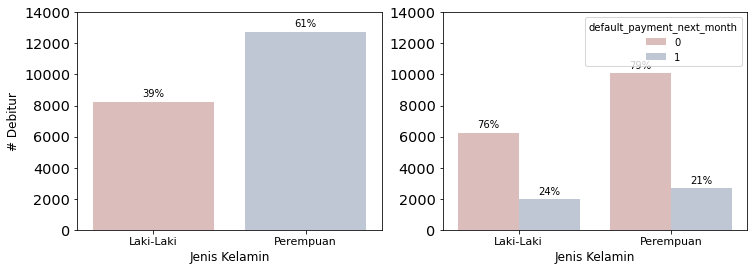

In [ ]:
plt.figure(figsize=(12,4))

df_1 = df_train_20D8GL3.groupby(['SEX','default_payment_next_month']).agg({'ID':'nunique'}).reset_index()
temp = df_train_20D8GL3.groupby(['SEX']).agg({'ID':'nunique'}).reset_index()

df_1 = df_1.merge(temp, on='SEX')
df_1.columns = ['SEX', 'default_payment_next_month', 'count', 'total']

plt.subplot(1, 2, 1)
ax = sns.countplot(x = 'SEX', data = df_train_20D8GL3, palette="vlag_r")
plt.xlabel("Jenis Kelamin", fontsize= 12)
plt.ylabel("# Debitur", fontsize= 12)
plt.xticks([0,1],['Laki-Laki', 'Perempuan'], fontsize = 11)
plt.ylim(0,14000)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height() / 21000)
    x = p.get_x() + p.get_width()/2 
    y = p.get_height() + 300
    ax.annotate(percentage, (x,y), ha='center')


plt.subplot(1, 2, 2)
ax = sns.barplot(x = 'SEX', y = 'count', data = df_1, hue='default_payment_next_month', palette="vlag_r")
plt.xlabel("Jenis Kelamin", fontsize= 12)
plt.ylabel("", fontsize= 12)
plt.xticks([0,1],['Laki-Laki', 'Perempuan'], fontsize = 11)
plt.ylim(0,14000)

i = 0
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height() / df_1['total'][i])
    i += 2
    if (i>3):
        i = 1
    x = p.get_x() + p.get_width()/2 
    y = p.get_height() + 300
    ax.annotate(percentage, (x,y), ha='center')

###  Pengamatan:
1. Dapat disimpulkan bahwa sekita 61% debitur adalah perempuan,namun berdasarkan grafik diatas, tampak laki-laki memiliki peluang gagal bayar yang sedikit lebih tinggi yaitu 24% dibandingkan perempuan yang hanya 21%.

### **B. Education**

Berdasarakan pengamatan pada statistik deskriptif, terdapat kategori 0 di EDUCATION yang didefinisikan dalam informasi dataset asli. Nilai '5' dan '6' pada kolom EDUCATION sama-sama diberi label  *Tidak Diketahui*, sehingga kategori 0 yang tidak terdefinisi tersebut akan ditempatkan dalam kategori yang sama yaitu *Tidak Diketahui*. 

In [ ]:
# `EDUCATION`: (1=pascasarjana, 2=universitas, 3=SMA, 4=lainnya, 5=tidak diketahui, 6=tidak diketahui)
df_train_20D8GL3['EDUCATION'].value_counts()

2    9789
1    7415
3    3467
5     200
4      85
6      34
0      10
Name: EDUCATION, dtype: int64

In [ ]:
df_train_20D8GL3.loc[:,'EDUCATION'] = df_train_20D8GL3.loc[:,'EDUCATION'].replace(0,5)
df_train_20D8GL3.loc[:,'EDUCATION'] = df_train_20D8GL3.loc[:,'EDUCATION'].replace(6,5)

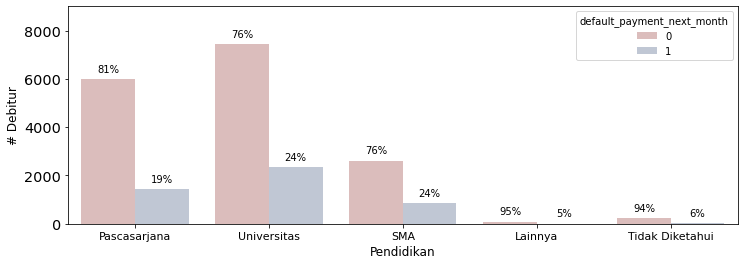

In [ ]:
df_2 = df_train_20D8GL3.groupby(['EDUCATION','default_payment_next_month']).agg({'ID':'nunique'}).reset_index()

temp = df_train_20D8GL3.groupby(['EDUCATION']).agg({'ID':'nunique'}).reset_index()

df_2 = df_2.merge(temp, on='EDUCATION')
df_2.columns = ['EDUCATION', 'default_payment_next_month', 'count', 'total']

df_2['percentage'] = 100*df_2['count']/df_2['total']

plt.figure(figsize=(12,4))

ax = sns.barplot(x = 'EDUCATION', y = 'count', data = df_2, hue='default_payment_next_month', palette = 'vlag_r')

plt.xlabel("Pendidikan", fontsize= 12)
plt.ylabel("# Debitur", fontsize= 12)
plt.ylim(0,9000)
plt.xticks([0,1,2,3,4],['Pascasarjana','Universitas','SMA','Lainnya','Tidak Diketahui'], fontsize = 11)

i = 0
for p in ax.patches:
    percentages = '{:.0f}%'.format(100 * p.get_height() / df_2['total'][i])
    
    i += 2
    if (i==10):
        i = 1
    x = p.get_x() + p.get_width()/2 
    y = p.get_height() + 300
    ax.annotate(percentages, (x,y), ha='center')

### Pengamatan:
1. Terdapat 10 data dalam kategori 0, 200 data dalam kategori 5, dan 34 data dalam kategori 6 yang kemudian akan digabungkan menjadi 1 kategori yaitu kategori 5 (Tidak Diketahui).
2. Tingkat pendidikan didominasi oleh Universitas, diikuti oleh Pascasarjana, SMA, Tidak Diketahui dan Lainnya. 
3. Apabila melihat 3 kategori pertama dalam grafik (pascasarjana, universitas, dan SMA), tampak bahwa semakin tinggi pendidikan debitur maka peluang gagal bayar menjadi lebih rendah, hal ini mungkin dikarenakan pemahaman mengenai rencana keuangan yang lebih baik seiring dengan meningkatnya tingkat pendidikan debitur.
4. Namun kategori Tidak Diketahui dan Lainnya memiliki peluang gagal bayar yang jauh lebih rendah dari tiga kategori lainnya, tapi untuk kedua kategori tersebut tidak dapat ditentukan apakah merupakan pendidikan yang lebih tinggi dari pascasarjana atau lebih rendah dari SMA.

### **C. MARRIAGE**


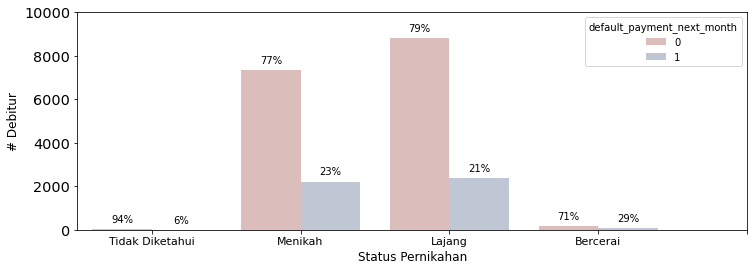

In [ ]:
df_3 = df_train_20D8GL3.groupby(['MARRIAGE','default_payment_next_month']).agg({'ID':'nunique'}).reset_index()

temp = df_train_20D8GL3.groupby(['MARRIAGE']).agg({'ID':'nunique'}).reset_index()

df_3 = df_3.merge(temp, on='MARRIAGE')
df_3.columns = ['MARRIAGE', 'default_payment_next_month', 'count', 'total']

df_3['percentage'] = 100*df_3['count']/df_3['total']

plt.figure(figsize=(12,4))

ax = sns.barplot(x = 'MARRIAGE', y = 'count', data = df_3, hue='default_payment_next_month', palette = 'vlag_r')

plt.xlabel("Status Pernikahan", fontsize= 12)
plt.ylabel("# Debitur", fontsize= 12)
plt.ylim(0,10000)
plt.xticks([0,1,2,3,4],['Tidak Diketahui', 'Menikah','Lajang','Bercerai'], fontsize = 11)

i = 0
for p in ax.patches:
    percentages = '{:.0f}%'.format(100 * p.get_height() / df_3['total'][i])
    
    i += 2
    if (i==8):
        i = 1
    x = p.get_x() + p.get_width()/2 
    y = p.get_height() + 300
    ax.annotate(percentages, (x,y), ha='center')

### Pengamatan:
1. Sebagian besar debitur berasal dari kategori Menikah dan Lajang.
2. Kategori Tidak Diketahui memiliki peluang default yang lebih rendah dibandingkan kategori lainnya.
3. Sementara itu, debitur yang memiliki status pernikahan bercerai memiliki peluang untuk gagal bayar lebih besar dibandingkan kategori lainnya, disusul oleh status menikah, dan kemudian lajang.

### **D. SEX & MARRIAGE**

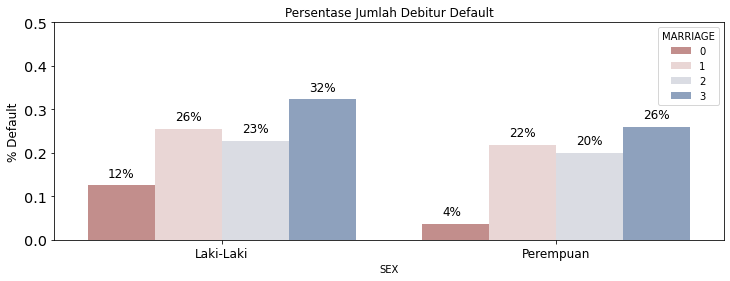

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "SEX", y = "default_payment_next_month", hue = "MARRIAGE", data = df_train_20D8GL3, palette = 'vlag_r', ci = None)

plt.ylabel("% Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Laki-Laki', 'Perempuan'], fontsize = 12)
plt.title('Persentase Jumlah Debitur Default')

for p in ax.patches:
    ax.annotate('{:.0f}%'.format(p.get_height()*100), (p.get_x()+0.06, p.get_height()+0.02),fontsize=12)

plt.show()

### Pengamatan:
1. Berdasarkan eksplorasi sebelumnya, diketahui bahwa laki-laki memiliki peluang default yang lebih besar dari perempuan. Selanjutnya akan dilakukan perbandingan jumlah debitur default berdasarkan SEX dengan MARRIAGE untuk mengetahui apakah kecenderungan akan tetap sama disetiap kategori MARRIAGE atau tidak.
2. Berdasarkan grafik diatas, disetiap kategori MARRIAGE ternyata dapat disimpulkan bahwa memang laki-laki memiliki kecenderungan untuk default dibandingkan perempuan.

### **E. SEX & EDUCATION**

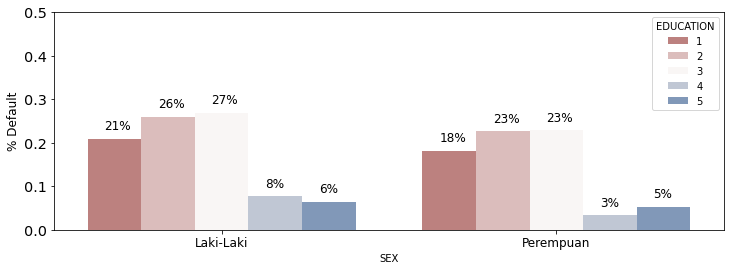

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "SEX", y = "default_payment_next_month", hue = "EDUCATION", data = df_train_20D8GL3, palette = 'vlag_r', ci = None)

plt.ylabel("% Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Laki-Laki', 'Perempuan'], fontsize = 12)

for p in ax.patches:
    ax.annotate('{:.0f}%'.format(p.get_height()*100), (p.get_x()+0.05, p.get_height()+0.02),fontsize=12)

plt.show()

### Pengamatan:
1. Berdasarkan grafik diatas, disetiap kategori EDUCATION ternyata dapat disimpulkan bahwa memang laki-laki memiliki kecenderungan untuk default dibandingkan perempuan.

## **Numerical Data**

In [ ]:
df_train_20D8GL3.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0


### **A. AGE**

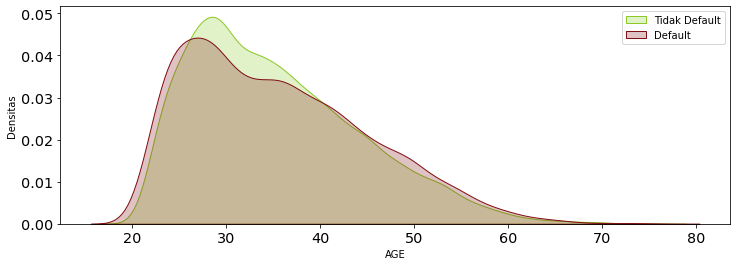

In [ ]:
plt.figure(figsize=(12,4))
sns.kdeplot(df_train_20D8GL3.loc[(df_train_20D8GL3['default_payment_next_month'] == 0), 'AGE'], label = 'Tidak Default', shade = True, color="#8ac926")
sns.kdeplot(df_train_20D8GL3.loc[(df_train_20D8GL3['default_payment_next_month'] == 1), 'AGE'], label = 'Default', shade = True, color="#800e13")
plt.ylabel('Densitas')
plt.legend()
plt.show()

Nilai min untuk AGE adalah 21 tahun, dan AGE maks 75 maka bins akan dimulai dari usia 21 hingga 79 tahun.

In [ ]:
bins=[20, 29, 39, 49, 59, 69, 79]
group=['20s','30s','40s','50s','60s','70s'] 

df_train_20D8GL3['AGE_BIN']=pd.cut(df_train_20D8GL3['AGE'],bins,labels=group)

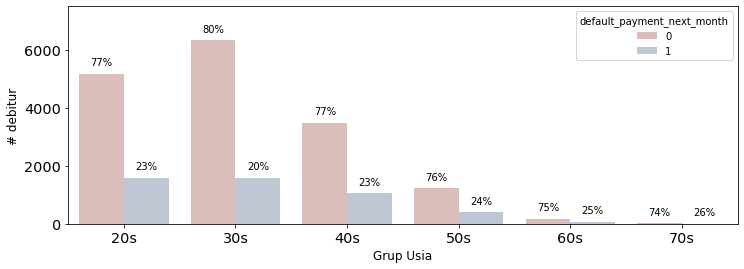

In [ ]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data = df_train_20D8GL3, x = 'AGE_BIN', hue="default_payment_next_month", palette = 'vlag_r')

plt.xlabel("Grup Usia", fontsize= 12)
plt.ylabel("# debitur", fontsize= 12)
plt.ylim(0,7500)

df_temp = df_train_20D8GL3.groupby(['AGE_BIN','default_payment_next_month']).agg({'ID':'nunique'}).reset_index()
temp = df_train_20D8GL3.groupby(['AGE_BIN']).agg({'ID':'nunique'}).reset_index()
df_temp = df_temp.merge(temp, on='AGE_BIN')
df_temp.columns = ['AGE_BIN', 'default_payment_next_month', 'count', 'total']

i = 0
for p in ax.patches:
    percentages = '{:.0f}%'.format(100 * p.get_height() / df_temp['total'][i])
    
    i += 2
    if (i==12):
        i = 1
    x = p.get_x() + p.get_width()/2 
    y = p.get_height() + 300
    ax.annotate(percentages, (x,y), ha='center')

In [ ]:
df_train_20D8GL3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          21000 non-null  int64   
 1   LIMIT_BAL                   21000 non-null  int64   
 2   SEX                         21000 non-null  int64   
 3   EDUCATION                   21000 non-null  int64   
 4   MARRIAGE                    21000 non-null  int64   
 5   AGE                         21000 non-null  int64   
 6   PAY_1                       21000 non-null  int64   
 7   PAY_2                       21000 non-null  int64   
 8   PAY_3                       21000 non-null  int64   
 9   PAY_4                       21000 non-null  int64   
 10  PAY_5                       21000 non-null  int64   
 11  PAY_6                       21000 non-null  int64   
 12  BILL_AMT1                   21000 non-null  int64   
 13  BILL_AMT2       

### Pengamatan:
1. Debitur didominasi oleh usia antara 25 sampai 40 tahun, berdasarkan grafik diatas juga terlihat bahwa dalam range usia 25 - 40 tahun tersebut memiliki peluang default yang lebih rendah.
2. Selanjutnya kolom Age akan dikelompokkan lebih lanjut untuk analisis lebih lanjut.
3. Peluang default paling rendah yaitu debitur dengan usia 30an (30-39 tahun), sementara default yang tinggi berada pada usia-usia lanjut yaitu default tertinggi pada range usia 70-79 tahun, disusul oleh 60-69 tahun, kemudian 50-59 tahun.

### **B. LIMIT_BAL**

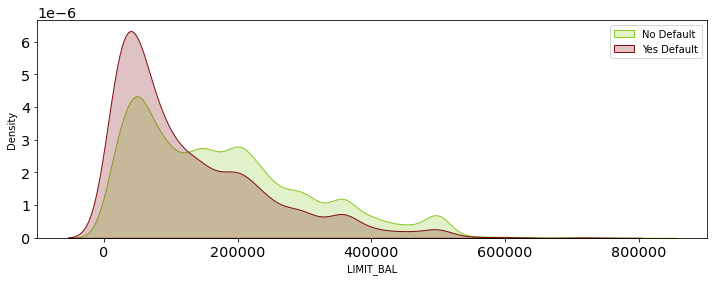

In [ ]:
plt.figure(figsize=(12,4))

sns.kdeplot(df_train_20D8GL3.loc[(df_train_20D8GL3['default_payment_next_month'] == 0), 'LIMIT_BAL'], label = 'No Default', shade = True, color="#8ac926")
sns.kdeplot(df_train_20D8GL3.loc[(df_train_20D8GL3['default_payment_next_month'] == 1), 'LIMIT_BAL'], label = 'Yes Default', shade = True, color="#800e13")
plt.legend()

In [ ]:
df_train_20D8GL3[df_train_20D8GL3['LIMIT_BAL'] > 600000].groupby(['default_payment_next_month']).count()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AGE_BIN
default_payment_next_month,,,,,,,,,,,,,,,,,,,,,,,,,
0,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43
1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


### Pengamatan:
1. Dapat disimpulkan bahwa data pada kolom LIMIT_BAL memiliki distribusi yang right-skewed dan berdasarkan grafik terdapat keberadaan beberapa outlier dengan nilai ekstrim positif.
2. Terlihat bahwa terdapat sejumlah kecil debitur dengan LIMIT_BAL yang lebih dari 600000, yaitu sebanyak 48 orang, dimana dari 48 orang tersebut terdapat 5 orang yang default.
3. Sebagian besar debitur memiliki limit kredit sebesar 200000 atau kurang, dan tampak dalam range tersebut terdapat jumlah debitur default yang tinggi dibandingkan limit kredit lainnya.
4. Selain itu dapat pula disimpulkan bahwa, semakin besar nilai LIMIT_BAL maka kecenderungan untuk default juga akan semakin menurun.

### **C. Repayment Status (PAY_X)**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

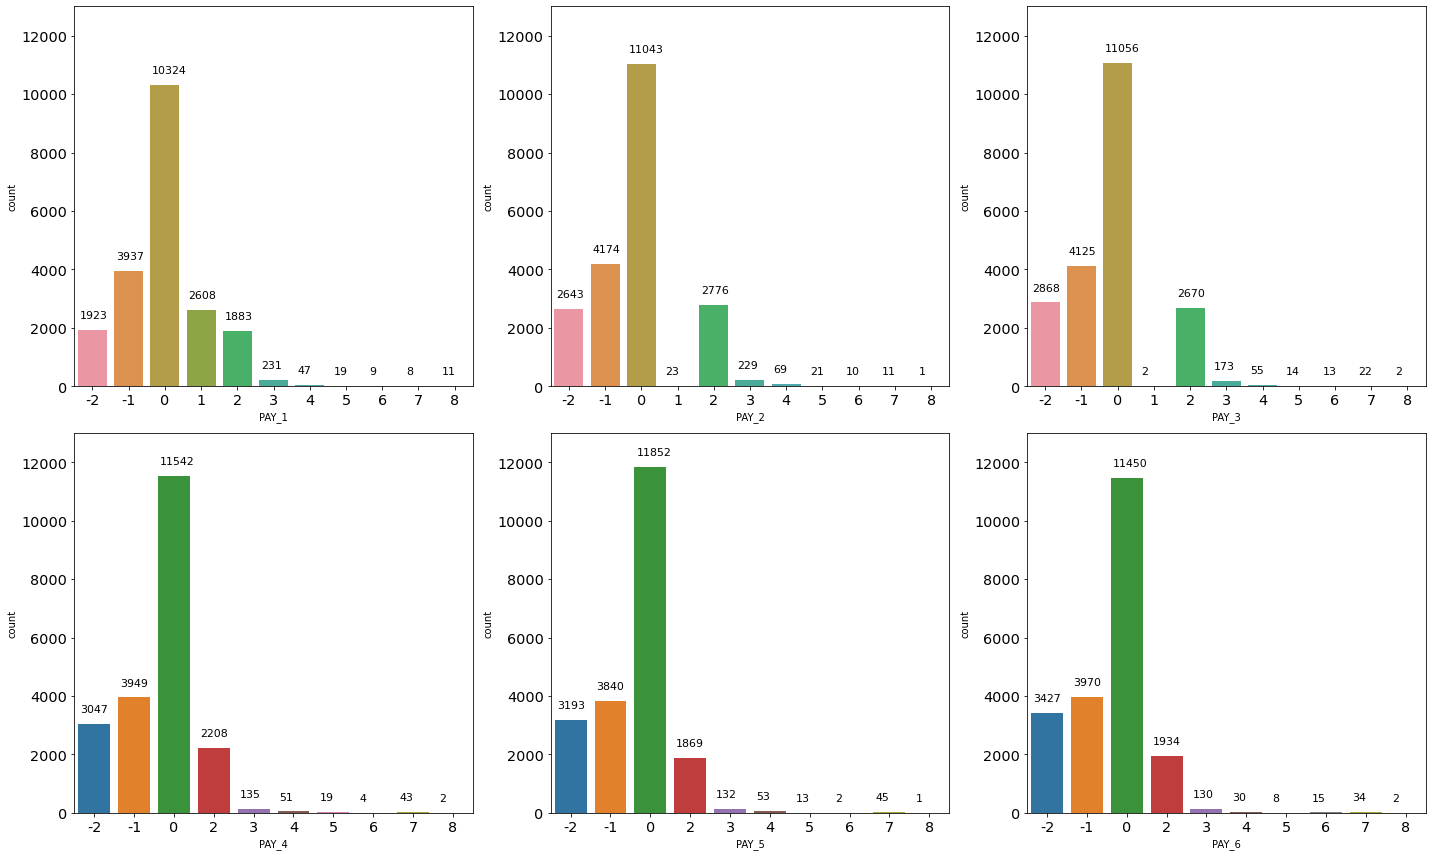

In [ ]:
pay_x = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize=(20,12))
for i,col in enumerate(pay_x):    
    plt.subplot(2,3,i + 1)
    ax = sns.countplot(df_train_20D8GL3.loc[:,col])
    plt.ylim(0,13000)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+400), fontsize = 11)

plt.show()

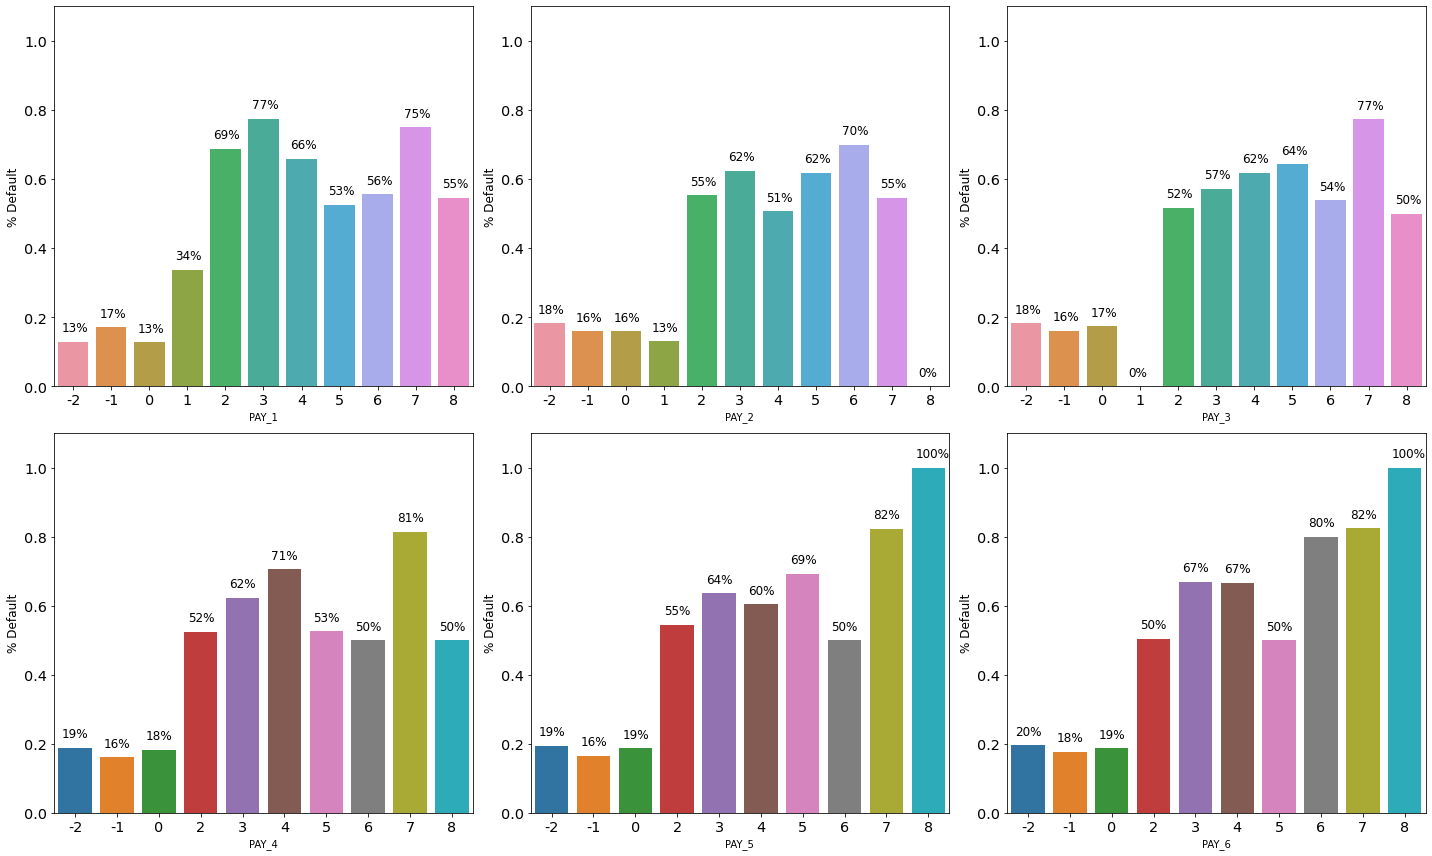

In [ ]:
plt.figure(figsize=(20,12))

for i,col in enumerate(pay_x):    
    plt.subplot(2,3,i + 1)
    ax = sns.barplot(x = col, y = "default_payment_next_month", data = df_train_20D8GL3, ci = None)
    plt.ylabel("% Default", fontsize= 12)
    plt.ylim(0,1.1)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate('{:.0f}%'.format(p.get_height()*100), (p.get_x()+0.09, p.get_height()+0.03),fontsize=12)

plt.show()

### Pengamatan:
1. Dari semua repayment status terlihat bahwa jumlah debitur didominasi oleh kategori 0 dan disusul oleh kategori -1, dimana berdasarkan grafik kedua terlihat jelas bahwa kemungkinan untuk default pada status pembayaran 0 dan -1 tersebut jauh lebih rendah dari status pembayaran lainnya.

### **D. BILL_AMT**

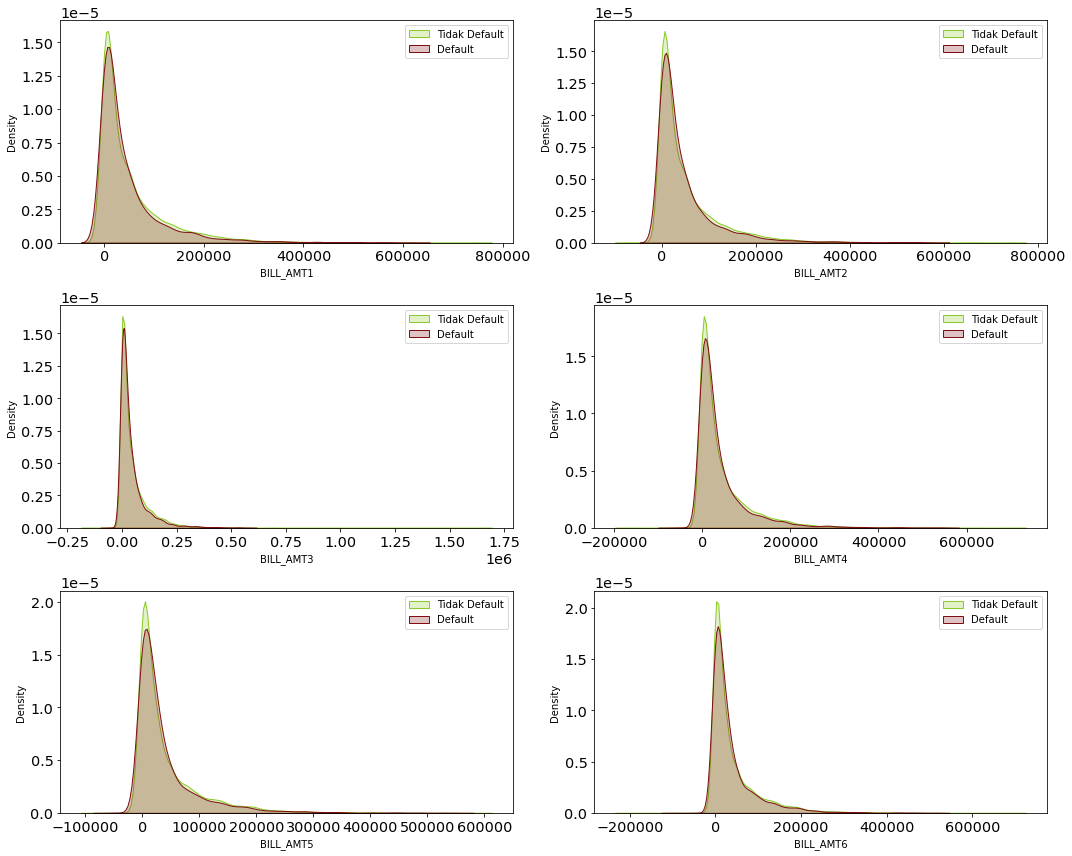

In [ ]:
plt.figure(figsize=(15,12))

bill_amtx = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
for i,col in enumerate(bill_amtx):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(df_train_20D8GL3.loc[(df_train_20D8GL3['default_payment_next_month'] == 0), col], label = 'Tidak Default', shade = True, color="#8ac926")
    sns.kdeplot(df_train_20D8GL3.loc[(df_train_20D8GL3['default_payment_next_month'] == 1), col], label = 'Default', shade = True, color="#800e13")
    # plt.xlim(-60000,800000)
    plt.legend()
    plt.tight_layout()

plt.show()

### Pengamatan:
1. Distribusi Bill amount juga right skewed, terdapat beberapa pembayaran yang lebih dibulan sebelumnya

### **E. PAY_AMT**

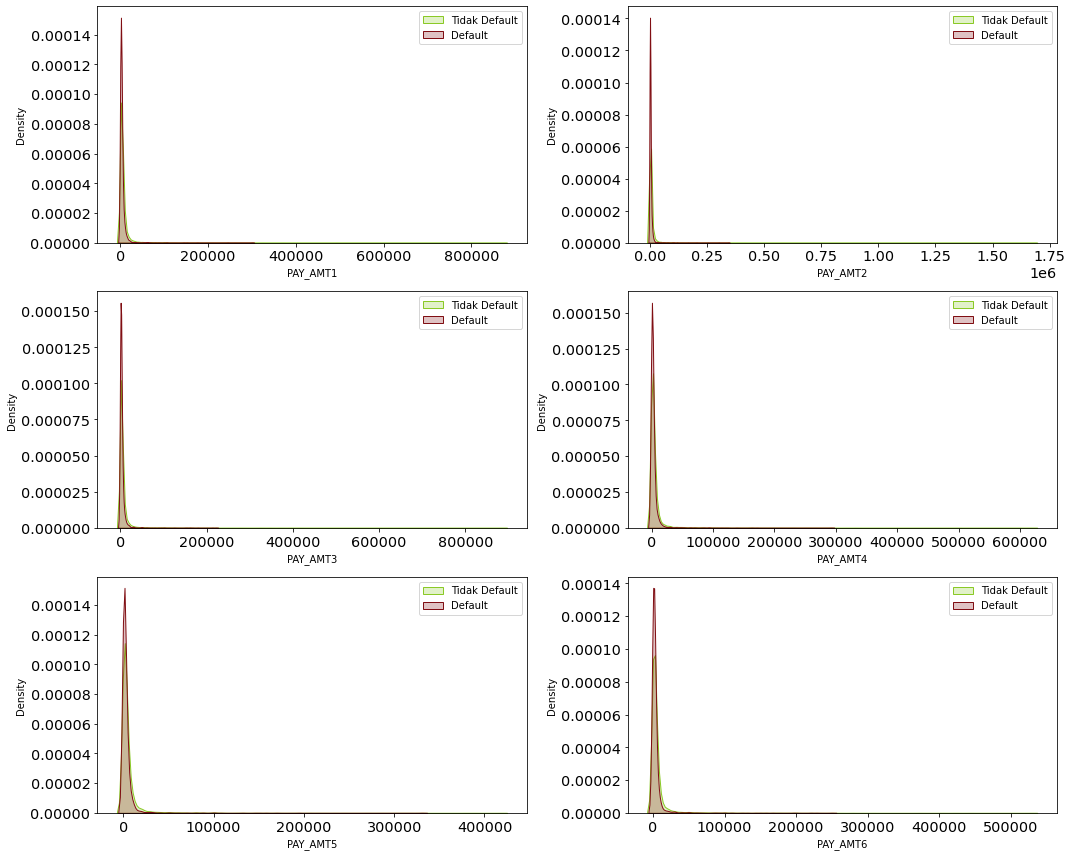

In [ ]:
plt.figure(figsize=(15,12))

pay_amtx = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for i,col in enumerate(pay_amtx):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(df_train_20D8GL3.loc[(df_train_20D8GL3['default_payment_next_month'] == 0), col], label = 'Tidak Default', shade = True, color="#8ac926")
    sns.kdeplot(df_train_20D8GL3.loc[(df_train_20D8GL3['default_payment_next_month'] == 1), col], label = 'Default', shade = True, color="#800e13")
    # plt.xlim(0,100000)
    plt.legend()
    plt.tight_layout()

plt.show()

### Pengamatan:
1. Terlihat bahwa untuk setiap PAY_AMT memiliki distribusi yang hampir sama yaitu right skewed dengan nilai ekstrem positif
2. Pay amount didominasi oleh pembayaran yang kurang dari 100000
3. Tampak juga bahwa semakin kecil nilai PAY_AMT maka peluang untuk default cendurung lebih besar terutama bagi debitur yang pembayarannya 0 (tidak membayar)

### **F. LIMIT_BAL vs Demografi**

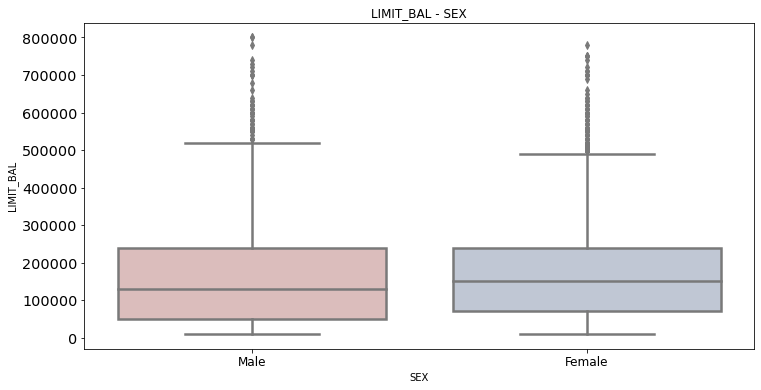

In [ ]:
plt.figure(figsize=(12,6))

sns.boxplot(x = "SEX", y = "LIMIT_BAL",data = df_train_20D8GL3, palette = 'vlag_r')
 
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
plt.title('LIMIT_BAL - SEX')

plt.show()

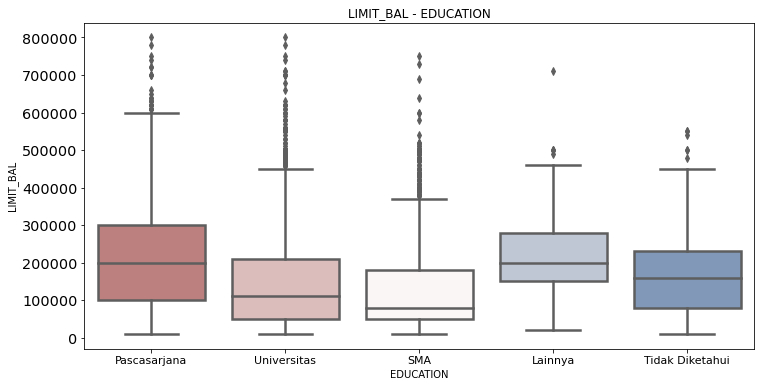

In [ ]:
plt.figure(figsize=(12,6))

sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL",data = df_train_20D8GL3, palette = 'vlag_r')
 
plt.xticks([0,1,2,3,4],['Pascasarjana','Universitas','SMA','Lainnya','Tidak Diketahui'], fontsize = 11)
plt.title('LIMIT_BAL - EDUCATION')

plt.show()

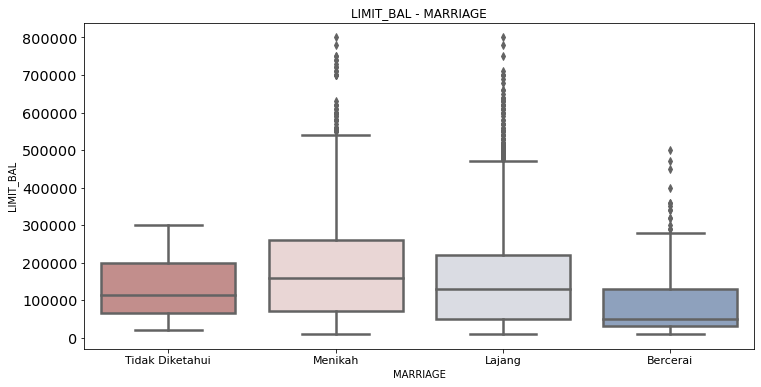

In [ ]:
plt.figure(figsize=(12,6))

sns.boxplot(x = "MARRIAGE", y = "LIMIT_BAL",data = df_train_20D8GL3, palette = 'vlag_r')
 
plt.xticks([0,1,2,3],['Tidak Diketahui', 'Menikah', 'Lajang', 'Bercerai'], fontsize = 11)
plt.title('LIMIT_BAL - MARRIAGE')

plt.show()

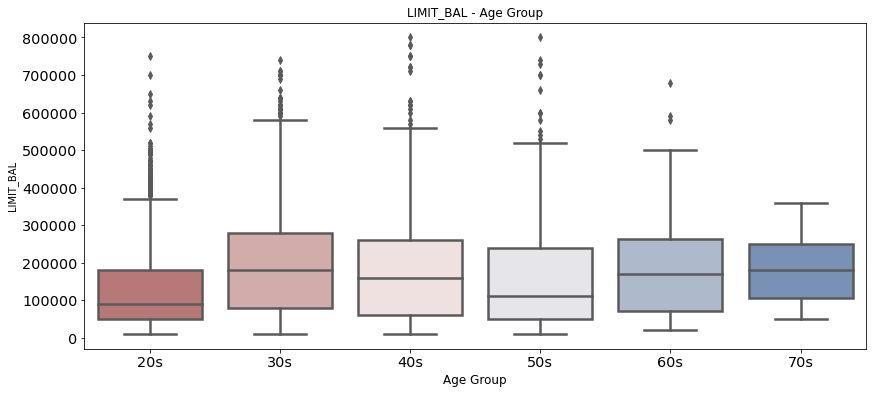

In [ ]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "AGE_BIN", y = "LIMIT_BAL",data = df_train_20D8GL3, palette = 'vlag_r')

plt.xlabel("Age Group", fontsize= 12)
plt.title('LIMIT_BAL - Age Group')

plt.show()

### Pengamatan:
1. Secara keseluruhan dari grafik-grafik antara Limit credit dengan data demografis, terlihat bahwa sebagian besar pemberian limit kredit berbanding lurus dengan probabilitas default pada kategori tersebut, maksudnya adalah terihat bahwa semakin kecil peluang default yang ditunjukkan pada bagian univariate analysis untuk categorical data, maka limit kredit yang diberikan juga akan semakin besar
2. Namun terdapat pengecualian yaitu pada kategori usia 60 tahun keatas dimana walaupun memiliki peluang gagal bayar yang tinggi dibandingkan kategori usia lainnya, namun kategori ini tetap mendapatkan limit kredit yang tinggi

# No.2 Target output olahan **data**

In [ ]:
df_train_20D8GL3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          21000 non-null  int64   
 1   LIMIT_BAL                   21000 non-null  int64   
 2   SEX                         21000 non-null  int64   
 3   EDUCATION                   21000 non-null  int64   
 4   MARRIAGE                    21000 non-null  int64   
 5   AGE                         21000 non-null  int64   
 6   PAY_1                       21000 non-null  int64   
 7   PAY_2                       21000 non-null  int64   
 8   PAY_3                       21000 non-null  int64   
 9   PAY_4                       21000 non-null  int64   
 10  PAY_5                       21000 non-null  int64   
 11  PAY_6                       21000 non-null  int64   
 12  BILL_AMT1                   21000 non-null  int64   
 13  BILL_AMT2       

In [ ]:
# default.payment.next.month: Pembayaran default di bulan berikutnya (1=yes, 0=no)
df_train_20D8GL3[df_train_20D8GL3['default_payment_next_month']==1]
# 4645 rows × 26 columns

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,AGE_BIN
3,13973,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,1,20s
5,28050,150000,2,1,2,29,-2,-2,-2,-2,-2,-1,0,5067,131,987,0,14001,5067,131,987,400,14001,0,1,20s
10,196,50000,2,1,2,24,1,2,2,2,2,2,36166,37188,37680,38462,39228,40035,1900,1400,1700,1532,1600,0,1,20s
20,4982,240000,1,3,1,43,-1,-1,2,2,2,2,2690,2500,2500,2500,2500,0,2500,0,0,0,0,0,1,40s
21,5928,320000,2,1,2,29,0,0,-2,-1,-1,0,12130,0,0,364,16177,16706,0,0,364,16177,800,650,1,20s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20980,24864,100000,1,2,1,41,-1,-1,-1,-1,0,0,91,949,3079,6427,6558,0,957,3079,6427,131,0,0,1,40s
20982,13292,50000,2,1,2,22,2,2,2,2,2,2,46035,46620,47341,45527,48358,47442,2000,1800,0,4100,0,2500,1,20s
20994,18863,50000,2,1,2,27,1,-1,-1,-1,0,0,0,45000,1000,4874,5374,5874,45000,1000,4874,500,500,0,1,20s
20997,4378,100000,1,1,1,52,1,2,2,2,0,0,21509,20877,24122,23440,28843,31353,0,3600,0,6000,3000,0,1,50s


In [ ]:
df_train_20D8GL3[df_train_20D8GL3['default_payment_next_month']==0]
# 16355 rows × 25 columns

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,AGE_BIN
0,25150,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0,20s
1,13470,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0,40s
2,3092,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0,40s
4,10567,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0,50s
6,23327,260000,2,1,1,36,0,0,0,0,0,-1,122825,88273,91908,90857,-81334,142645,5000,6000,5020,81569,331788,10002,0,30s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20992,29959,230000,1,3,2,31,0,-1,-1,-1,-1,-1,4261,25,221,417,613,-191,1000,1000,1000,1000,0,0,0,30s
20993,9351,400000,2,2,1,34,-1,-1,0,-1,-1,0,14986,25772,12621,13983,3378,3770,25772,1500,13983,3378,2000,9353,0,30s
20995,6283,50000,2,2,2,31,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,30s
20996,25589,80000,2,2,1,37,0,0,0,0,0,0,69767,73197,44195,45458,48679,49895,5000,3000,2000,4000,2000,2000,0,30s


In [ ]:
df_train_20D8GL3[ df_train_20D8GL3['default_payment_next_month'].isin( [1, 0] ) ]
# 21000 rows × 26 columns

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,AGE_BIN
0,25150,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0,20s
1,13470,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0,40s
2,3092,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0,40s
3,13973,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,1,20s
4,10567,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0,50s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,6283,50000,2,2,2,31,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,30s
20996,25589,80000,2,2,1,37,0,0,0,0,0,0,69767,73197,44195,45458,48679,49895,5000,3000,2000,4000,2000,2000,0,30s
20997,4378,100000,1,1,1,52,1,2,2,2,0,0,21509,20877,24122,23440,28843,31353,0,3600,0,6000,3000,0,1,50s
20998,8604,90000,2,2,1,47,0,0,0,0,0,0,28477,28718,28847,28747,29177,29452,2000,2000,2000,2000,2000,2000,0,40s


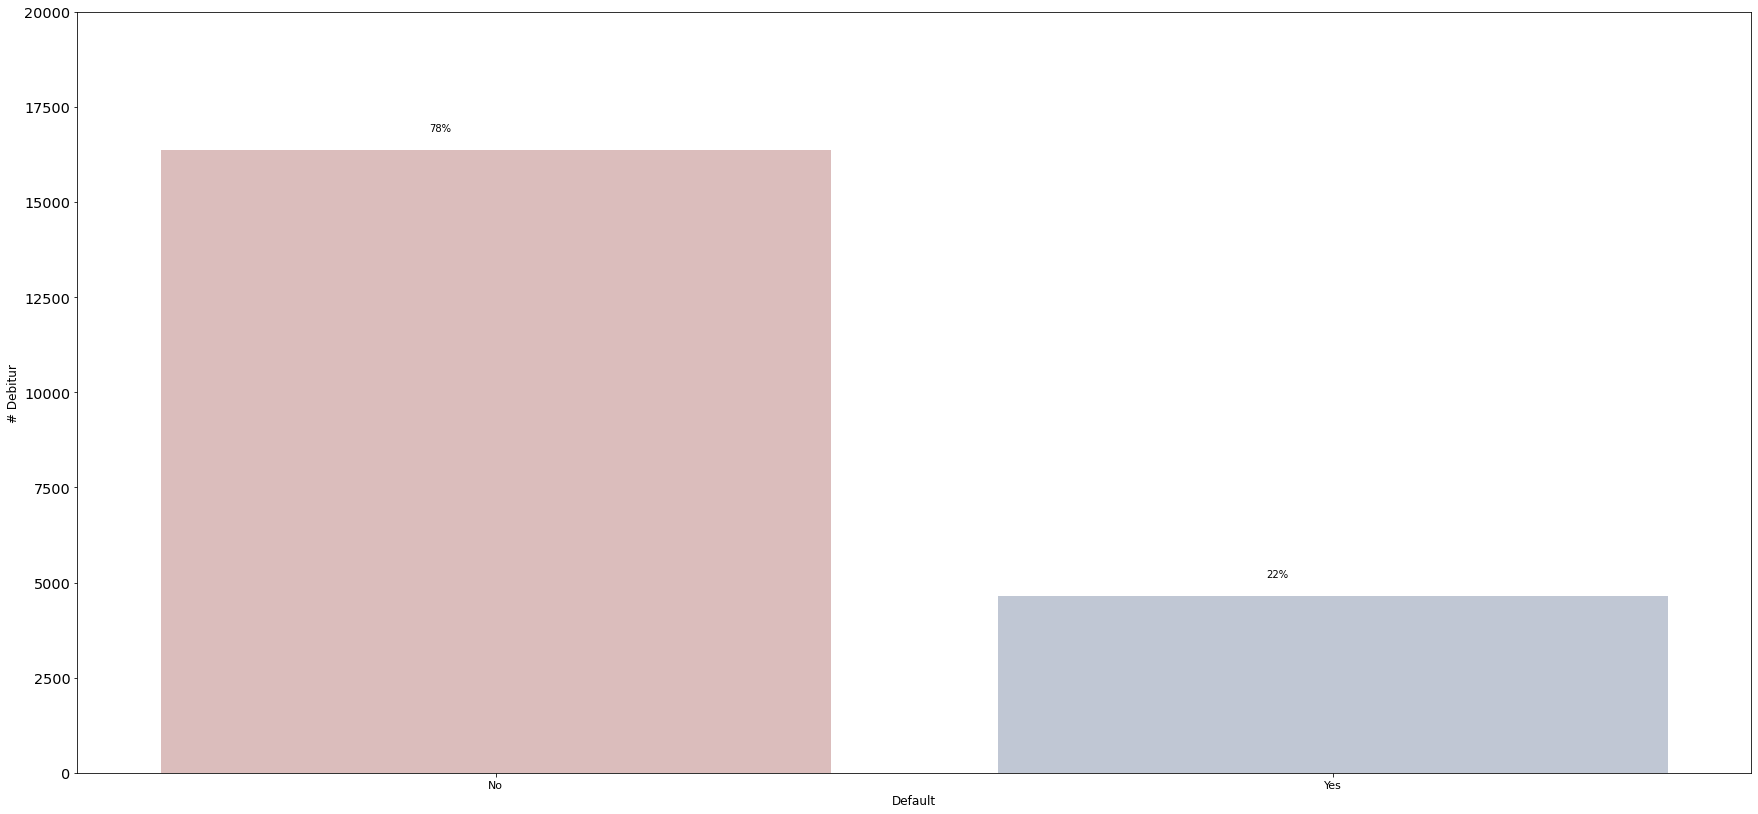

In [ ]:
ax = sns.countplot(x="default_payment_next_month", data=df_train_20D8GL3, palette="vlag_r")

plt.xlabel("Default", fontsize= 12)
plt.ylabel("# Debitur", fontsize= 12)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 11)
plt.ylim(0,20000)

for p in ax.patches:
    ax.annotate('{:.0f}%'.format(100 * p.get_height() / 21000), (p.get_x()+0.32, p.get_height()+500))
    
plt.show()

In [ ]:
df_train_20D8GL3.groupby('default_payment_next_month').agg(['mean']).transpose()

,default_payment_next_month,0,1
ID,mean,15026.017670,14678.651884
LIMIT_BAL,mean,178153.592174,128699.177610
SEX,mean,1.617365,1.573089
EDUCATION,mean,1.846408,1.885038
MARRIAGE,mean,1.556405,1.535199
AGE,mean,35.428921,35.576749
PAY_1,mean,-0.206237,0.675565
PAY_2,mean,-0.295628,0.465662
PAY_3,mean,-0.315561,0.365770
PAY_4,mean,-0.355671,0.265877


### Pengamatan:
1. Terdapat 4645 (22%) dari 21000 entries orang yang gagal bayar bulan depan. Sisanya tidak gagal bayar berjumlah 16355 (78%) dari 21000

### Kesimpulan:
1. Kita akan membuat model yang akan menurunkan jumlah pelanggan yang default payment dibawah 22%

# No.3 Mengecek apakah ada data bermasalah.

1. Terdapat nilai yang belum terdefinisi dalam dataset kolom `PAY_0 - PAY_6`, yaitu nilai 0 dan -2.
2. Terdapat nilai yang belum terdefinisi dalam dataset kolom `MARRIAGE`, yaitu nilai 0.
3. Terdapat nilai yang belum terdefinisi dalam dataset kolom `EDUCATION`, yaitu nilai 0.
4. Terdapat nilai minus pada nilai min untuk kolom BILL_AMT1 - BILL_AMT6, dimana seharusnya untuk jumlah bill statement tidak ada yang bernilai negatif.(kemungkinan nilai minus memiliki arti lain seperti kelebihan bayar)

### Categoricals

In [ ]:

for col in categoricals:
    print(f'''Value count kolom {col}:''')
    print(df_train_20D8GL3[col].value_counts())
    print()
# * `EDUCATION`: (1=pascasarjana, 2=universitas, 3=SMA, 4=lainnya, 5=tidak diketahui, 6=tidak diketahui)
# * `MARRIAGE`: Status pernikahan (1=menikah, 2=lajang, 3=bercerai)
# * `AGE`: Usia dalam tahun
# * `PAY_0`: Status pembayaran pada bulan September 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
# * `PAY_2`: Status pembayaran pada Agustus 2005 (skala sama dengan `PAY_0`)
# * `PAY_3`: Status pembayaran pada Juli 2005 (skala sama dengan `PAY_0`)
# * `PAY_4`: Status pembayaran pada Juni 2005 (skala sama dengan `PAY_0`)
# * `PAY_5`: Status pembayaran pada Mei 2005 (skala sama dengan `PAY_0`)
# * `PAY_6`: Status pembayaran pada April 2005 (skala sama dengan `PAY_0`)

Value count kolom SEX:
2    12759
1     8241
Name: SEX, dtype: int64

Value count kolom EDUCATION:
2    9789
1    7415
3    3467
5     244
4      85
Name: EDUCATION, dtype: int64

Value count kolom PAY_1:
 0    10324
-1     3937
 1     2608
-2     1923
 2     1883
 3      231
 4       47
 5       19
 8       11
 6        9
 7        8
Name: PAY_1, dtype: int64

Value count kolom PAY_2:
 0    11043
-1     4174
 2     2776
-2     2643
 3      229
 4       69
 1       23
 5       21
 7       11
 6       10
 8        1
Name: PAY_2, dtype: int64

Value count kolom PAY_3:
 0    11056
-1     4125
-2     2868
 2     2670
 3      173
 4       55
 7       22
 5       14
 6       13
 8        2
 1        2
Name: PAY_3, dtype: int64

Value count kolom PAY_4:
 0    11542
-1     3949
-2     3047
 2     2208
 3      135
 4       51
 7       43
 5       19
 6        4
 8        2
Name: PAY_4, dtype: int64

Value count kolom PAY_5:
 0    11852
-1     3840
-2     3193
 2     1869
 3      132
 4       53

### Pengamatan:
1. Pada kolom `MARRIAGE` nilai 0 ada 36. Nilai 0 belum terdefinisi
2. Pada kolom `EDUCATION` nilai 0 ada 10. Nilai 0 belum terdefinisi
3. Pada kolom `PAY_1` nilai 0 ada 10324, dan nilai -2 ada 1923. nilai 0 dan -2 belum terdefinisi
4. Pada kolom `PAY_2` nilai 0 ada 11043, dan nilai -2 ada 2643. nilai 0 dan -2 belum terdefinisi
5. Pada kolom `PAY_3` nilai 0 ada 11056, dan nilai -2 ada 2868. 
6. Pada kolom `PAY_4` nilai 0 ada 11542, dan nilai -2 ada 3047. 
7. Pada kolom `PAY_5` nilai 0 ada 11852, dan nilai -2 ada 3193. 
8. Pada kolom `PAY_6` nilai 0 ada 11450, dan nilai -2 ada 3427. 

### Numericals

In [ ]:
# * `BILL_AMT1`: Jumlah tagihan tagihan pada bulan September 2005 (NT dollar)
# * `BILL_AMT2`: Jumlah tagihan tagihan pada bulan Agustus 2005 (NT dollar)
# * `BILL_AMT3`: Jumlah tagihan tagihan pada bulan Juli 2005 (NT dollar)
# * `BILL_AMT4`: Jumlah tagihan tagihan pada bulan Juni 2005 (NT dollar)
# * `BILL_AMT5`: Jumlah tagihan tagihan pada bulan Mei 2005 (NT dollar)
# * `BILL_AMT6`: Jumlah tagihan tagihan pada bulan April 2005 (NT dollar)

In [ ]:
df_train_20D8GL3[df_train_20D8GL3['BILL_AMT1']<0]
# 366 rows × 25 columns

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,AGE_BIN
18,1775,120000,2,1,2,28,-2,-2,-2,-2,-2,-2,-8,2046,0,409,872,1539,2054,0,409,872,1539,580,0,20s
44,22999,150000,2,4,3,49,1,-2,-1,-1,0,-1,-260,-2835,3960,10410,2361,2868,4,7920,10426,0,2868,4384,0,40s
55,26161,100000,2,2,1,44,1,-2,-2,-2,-1,2,-1651,-5469,-7292,-10938,5887,3882,0,0,0,16825,0,1823,0,40s
112,29566,50000,1,3,1,47,1,-2,-1,0,0,0,-2012,-2012,47714,48685,18139,18519,0,50224,2195,649,672,749,0,40s
125,13503,80000,2,1,2,39,-2,-1,-1,-1,-1,-1,-224,1357,3446,4969,0,2650,1581,3466,4969,0,2650,935,0,30s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20807,8357,360000,1,2,1,44,1,-1,-1,-1,-1,-1,-3,583,-17,3440,1368,146,586,0,3457,1375,200,754,0,40s
20839,11278,340000,2,1,1,49,1,-2,-2,-1,-1,-1,-11,-11,-11,2894,0,530,0,0,2905,0,530,0,1,40s
20942,9357,130000,2,1,2,29,-2,-2,-2,-2,-2,-2,-200,-200,0,2115,0,0,0,200,2115,0,0,0,1,20s
20966,26335,150000,2,1,2,31,1,-2,-2,-2,-2,-2,-512,-512,-512,-512,-508,-913,0,0,0,4,0,0,0,30s


In [ ]:
df_train_20D8GL3[df_train_20D8GL3['BILL_AMT2']<0]
# 422 rows × 25 columns

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,AGE_BIN
44,22999,150000,2,4,3,49,1,-2,-1,-1,0,-1,-260,-2835,3960,10410,2361,2868,4,7920,10426,0,2868,4384,0,40s
55,26161,100000,2,2,1,44,1,-2,-2,-2,-1,2,-1651,-5469,-7292,-10938,5887,3882,0,0,0,16825,0,1823,0,40s
86,23151,200000,2,2,1,32,-2,-2,-2,-2,-2,-2,899,-1,-1,228,1374,380,0,0,229,1380,381,3880,0,30s
112,29566,50000,1,3,1,47,1,-2,-1,0,0,0,-2012,-2012,47714,48685,18139,18519,0,50224,2195,649,672,749,0,40s
194,24274,280000,1,1,2,31,-2,-2,-2,-2,-2,-2,-1,-1,-1,-1,-1,219,0,0,82150,0,220,1124,0,30s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20839,11278,340000,2,1,1,49,1,-2,-2,-1,-1,-1,-11,-11,-11,2894,0,530,0,0,2905,0,530,0,1,40s
20884,22550,180000,2,1,1,35,-1,-1,-1,2,-1,-1,3544,-36,163,163,1772,148,0,1000,0,2000,0,5000,0,30s
20942,9357,130000,2,1,2,29,-2,-2,-2,-2,-2,-2,-200,-200,0,2115,0,0,0,200,2115,0,0,0,1,20s
20966,26335,150000,2,1,2,31,1,-2,-2,-2,-2,-2,-512,-512,-512,-512,-508,-913,0,0,0,4,0,0,0,30s


In [ ]:
df_train_20D8GL3[df_train_20D8GL3['BILL_AMT3']<0]
# 415 rows × 25 columns

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,AGE_BIN
55,26161,100000,2,2,1,44,1,-2,-2,-2,-1,2,-1651,-5469,-7292,-10938,5887,3882,0,0,0,16825,0,1823,0,40s
86,23151,200000,2,2,1,32,-2,-2,-2,-2,-2,-2,899,-1,-1,228,1374,380,0,0,229,1380,381,3880,0,30s
194,24274,280000,1,1,2,31,-2,-2,-2,-2,-2,-2,-1,-1,-1,-1,-1,219,0,0,82150,0,220,1124,0,30s
210,20294,360000,2,1,1,52,-2,-2,-2,-1,-1,-2,-3,-3,-3,1000,0,0,0,0,1003,0,0,0,1,50s
269,8616,270000,2,2,2,53,1,1,-2,-2,-2,-1,716,-1524,-3764,-4,-19205,42418,2,2,6002,2,64446,5002,0,50s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20839,11278,340000,2,1,1,49,1,-2,-2,-1,-1,-1,-11,-11,-11,2894,0,530,0,0,2905,0,530,0,1,40s
20874,4032,150000,2,1,2,35,1,-1,-1,-2,-2,-1,0,1070,-240,-240,-240,390,1070,0,0,0,1170,390,0,30s
20966,26335,150000,2,1,2,31,1,-2,-2,-2,-2,-2,-512,-512,-512,-512,-508,-913,0,0,0,4,0,0,0,30s
20975,18961,200000,2,1,2,29,-2,-2,-2,-2,-2,-1,-792,-792,-792,-792,-792,69708,0,792,0,0,70500,1688,1,20s


In [ ]:
df_train_20D8GL3[df_train_20D8GL3['BILL_AMT4']<0]
# 428 rows × 25 columns

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,AGE_BIN
54,21120,160000,1,1,1,40,0,0,2,2,-1,2,4024,6484,3503,-473,3757,3286,3000,0,0,4700,0,3000,1,40s
55,26161,100000,2,2,1,44,1,-2,-2,-2,-1,2,-1651,-5469,-7292,-10938,5887,3882,0,0,0,16825,0,1823,0,40s
122,11202,480000,1,2,1,44,-2,-1,-1,-1,-1,-1,21149,1729,20468,-16,3109,18216,1743,20690,0,3125,18307,524,0,40s
128,1012,410000,2,1,1,31,-1,-1,2,2,-2,-2,2744,2041,630,-736,-1591,-2303,2051,5,266,266,253,6384,0,30s
194,24274,280000,1,1,2,31,-2,-2,-2,-2,-2,-2,-1,-1,-1,-1,-1,219,0,0,82150,0,220,1124,0,30s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20872,10380,310000,2,1,2,29,-1,-1,-1,-1,-2,-1,760,3674,368,-2444,-2444,151306,3674,500,0,0,155438,5231,0,20s
20874,4032,150000,2,1,2,35,1,-1,-1,-2,-2,-1,0,1070,-240,-240,-240,390,1070,0,0,0,1170,390,0,30s
20966,26335,150000,2,1,2,31,1,-2,-2,-2,-2,-2,-512,-512,-512,-512,-508,-913,0,0,0,4,0,0,0,30s
20975,18961,200000,2,1,2,29,-2,-2,-2,-2,-2,-1,-792,-792,-792,-792,-792,69708,0,792,0,0,70500,1688,1,20s


In [ ]:
df_train_20D8GL3[df_train_20D8GL3['BILL_AMT5']<0]
# 427 rows × 25 columns

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,AGE_BIN
6,23327,260000,2,1,1,36,0,0,0,0,0,-1,122825,88273,91908,90857,-81334,142645,5000,6000,5020,81569,331788,10002,0,30s
128,1012,410000,2,1,1,31,-1,-1,2,2,-2,-2,2744,2041,630,-736,-1591,-2303,2051,5,266,266,253,6384,0,30s
180,29578,450000,1,1,1,42,-1,2,-1,-1,-1,-2,3566,240,1718,2284,-561,-1477,0,2000,2300,0,590,0,1,40s
184,4485,160000,2,1,2,23,0,0,0,0,0,-2,151246,155926,113767,50531,-10,-5,10517,20258,20157,0,0,3570,0,20s
194,24274,280000,1,1,2,31,-2,-2,-2,-2,-2,-2,-1,-1,-1,-1,-1,219,0,0,82150,0,220,1124,0,30s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20872,10380,310000,2,1,2,29,-1,-1,-1,-1,-2,-1,760,3674,368,-2444,-2444,151306,3674,500,0,0,155438,5231,0,20s
20874,4032,150000,2,1,2,35,1,-1,-1,-2,-2,-1,0,1070,-240,-240,-240,390,1070,0,0,0,1170,390,0,30s
20966,26335,150000,2,1,2,31,1,-2,-2,-2,-2,-2,-512,-512,-512,-512,-508,-913,0,0,0,4,0,0,0,30s
20975,18961,200000,2,1,2,29,-2,-2,-2,-2,-2,-1,-792,-792,-792,-792,-792,69708,0,792,0,0,70500,1688,1,20s


In [ ]:
df_train_20D8GL3[df_train_20D8GL3['BILL_AMT6']<0]
# 455 rows × 25 columns

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,AGE_BIN
94,2384,60000,1,2,1,35,0,0,0,0,-1,-1,22226,18597,13801,8038,7340,-153,1292,2245,161,7340,0,20341,0,30s
128,1012,410000,2,1,1,31,-1,-1,2,2,-2,-2,2744,2041,630,-736,-1591,-2303,2051,5,266,266,253,6384,0,30s
180,29578,450000,1,1,1,42,-1,2,-1,-1,-1,-2,3566,240,1718,2284,-561,-1477,0,2000,2300,0,590,0,1,40s
184,4485,160000,2,1,2,23,0,0,0,0,0,-2,151246,155926,113767,50531,-10,-5,10517,20258,20157,0,0,3570,0,20s
219,5663,200000,2,2,1,33,-1,-1,-1,-1,0,0,7770,3266,200,15845,15845,-39,5846,200,15845,0,0,0,0,30s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20783,10421,50000,2,2,2,23,0,0,0,0,-1,-1,33109,32856,27438,4786,768,-579,1660,1600,624,768,173,30267,0,20s
20860,2838,130000,2,1,2,26,0,-1,-1,-1,-2,-2,20054,1298,6712,-884,-6332,-9333,1298,6730,900,5448,0,25000,0,20s
20875,15759,20000,2,1,3,22,2,0,0,0,0,0,14033,14993,16244,18300,18100,-1900,1500,1800,2800,0,0,1900,1,20s
20966,26335,150000,2,1,2,31,1,-2,-2,-2,-2,-2,-512,-512,-512,-512,-508,-913,0,0,0,4,0,0,0,30s


### Pengamatan:
1. Nilai negatif pada BILL_AMT1 ada 366
2. Nilai negatif pada BILL_AMT2 ada 422
3. Nilai negatif pada BILL_AMT3 ada 415
4. Nilai negatif pada BILL_AMT4 ada 428
5. Nilai negatif pada BILL_AMT5 ada 427
6. Nilai negatif pada BILL_AMT6 ada 455

### kesimpulan:
1. Nilai 0 pada `MARRIAGE` kita akan asumsikan menjadi nilai unknown karena hanya 36 (Sangat sedikit
2. Nilai 0 pada `EDUCATION` kita akan asumsikan menjadi nilai unknown karena hanya 10 (Sangat sedikit
3. Nilai 0 pada `PAY_1-PAY_6` kita akan asumsikan , dan nilai -2 kita akan asumsikan ....
4. Nilai minus pada nilai min untuk kolom `BILL_AMT1 - BILL_AMT6` dapat kita asumsikan sebagai kelebihan bayar, melihat dari jumlahnya 


# No.4 Handling missing value

In [ ]:
df_train_20D8GL3.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
AGE_BIN                       0
dtype: int64

# No.5 Handling duplicated data

In [ ]:
df_train_20D8GL3.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,AGE_BIN
0,25150,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0,20s
1,13470,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0,40s
2,3092,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0,40s
3,13973,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,1,20s
4,10567,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0,50s


In [ ]:
# cek jumlah duplicated rows
# dari semua kolom
df_train_20D8GL3.duplicated().sum()

0

# No.6 Handling outlier data

In [ ]:
from scipy import stats
import numpy as np

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_train_20D8GL3)}')

filtered_entries = np.array([True] * len(df_train_20D8GL3))

for col in numericals:
    zscore = abs(stats.zscore(df_train_20D8GL3[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_train_20D8GL3 = df_train_20D8GL3[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_train_20D8GL3)}')

Jumlah baris sebelum memfilter outlier: 21000
Jumlah baris setelah memfilter outlier: 19027


In [ ]:
#z_scores = np.abs(stats.zscore(df_train_20D8GL3['LIMIT_BAL']))
#filtered_data = (z_scores < 3)
#df_train_20D8GL3 = df_train_20D8GL3[filtered_data]

#print(f'Jumlah baris setelah memfilter outlier: {len(df_train_20D8GL3)}')

### Kesimpulan:
1. Nilai entries data menjadi 19027, setelah membuang 9,4% dari entries data aslinya 

# No.7 Handling imbalanced data

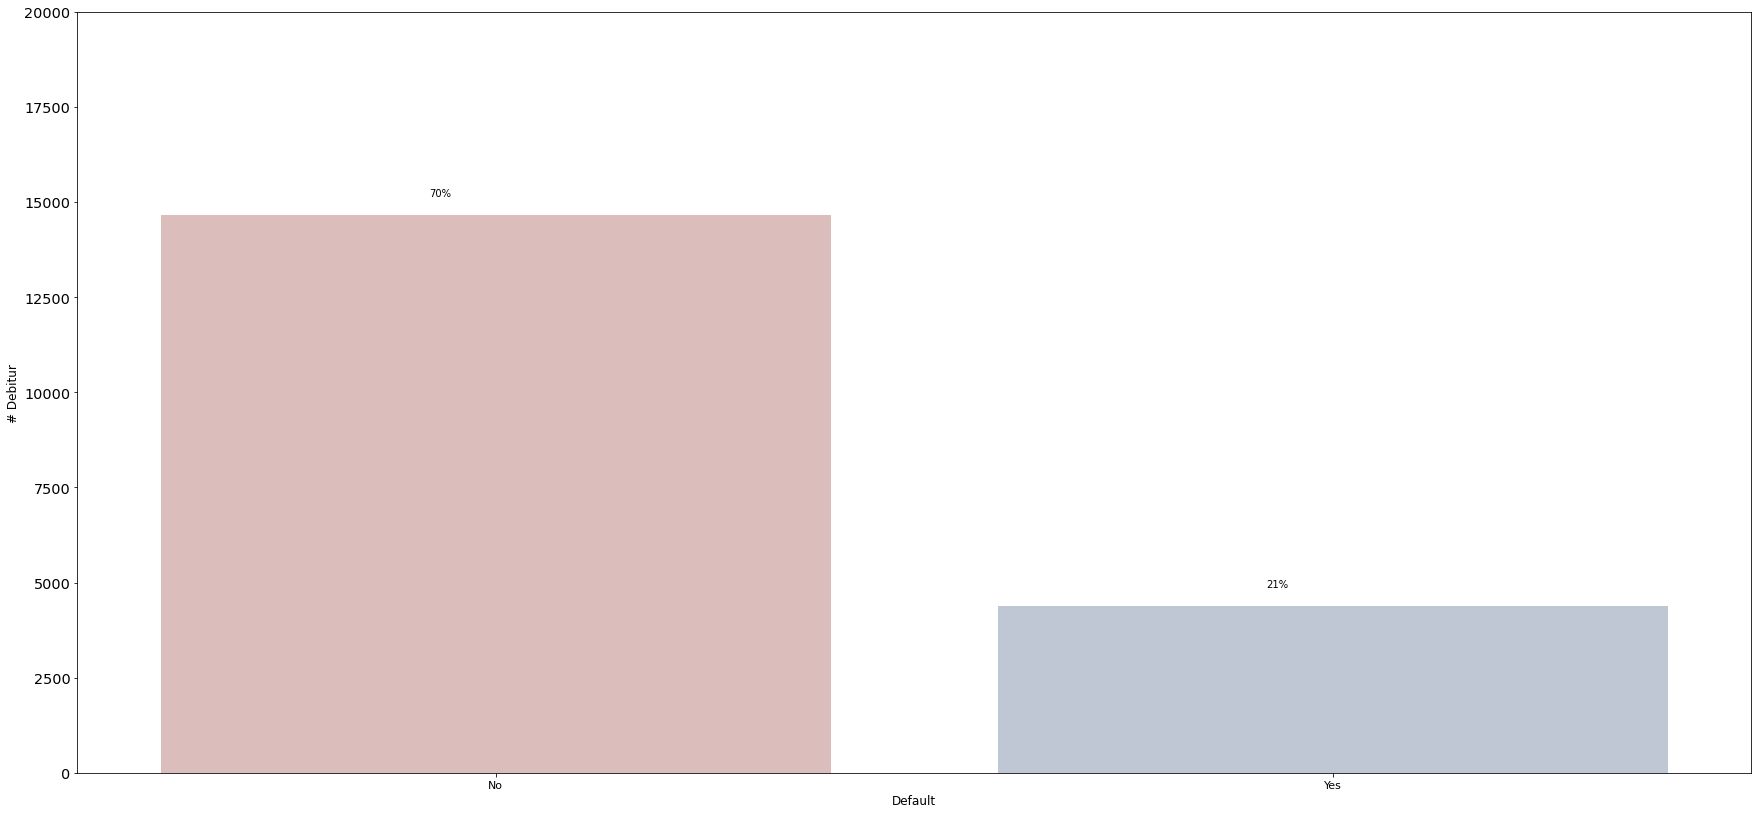

In [ ]:
ax = sns.countplot(x="default_payment_next_month", data=df_train_20D8GL3, palette="vlag_r")

plt.xlabel("Default", fontsize= 12)
plt.ylabel("# Debitur", fontsize= 12)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 11)
plt.ylim(0,20000)

for p in ax.patches:
    ax.annotate('{:.0f}%'.format(100 * p.get_height() / 21000), (p.get_x()+0.32, p.get_height()+500))
    
plt.show()

### Kesimpulan:
1. Melihat dari visualisasi diatas, nilainya adalah 7:3 yang berarti termasuk imbalanced

# No.8 Handling data redundan

# No.9 Handling data bermasalah lainnya

## Standardization Numeric Data

In [ ]:
from sklearn.preprocessing import StandardScaler

ftrs = ['LIMIT_BAL', 'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6', 'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
for f in ftrs:
  df_train_20D8GL3[f] = StandardScaler().fit_transform(df_train_20D8GL3[f].values.reshape(len(df_train_20D8GL3), 1))

df_train_20D8GL3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19027 entries, 0 to 20999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          19027 non-null  int64   
 1   LIMIT_BAL                   19027 non-null  float64 
 2   SEX                         19027 non-null  int64   
 3   EDUCATION                   19027 non-null  int64   
 4   MARRIAGE                    19027 non-null  int64   
 5   AGE                         19027 non-null  int64   
 6   PAY_1                       19027 non-null  int64   
 7   PAY_2                       19027 non-null  int64   
 8   PAY_3                       19027 non-null  int64   
 9   PAY_4                       19027 non-null  int64   
 10  PAY_5                       19027 non-null  int64   
 11  PAY_6                       19027 non-null  int64   
 12  BILL_AMT1                   19027 non-null  float64 
 13  BILL_AMT2       

### Kesimpulan:
1. Merubah range nilai ftrs, agar persebaran data mendekati distribusi normal

## One Hot Encoding

In [ ]:
ftrs = ['AGE_BIN', 'MARRIAGE', 'EDUCATION', 'PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

for f in ftrs:
  onehots = pd.get_dummies(df_train_20D8GL3[f], prefix=f)
  df_train_20D8GL3 = df_train_20D8GL3.join(onehots)

df_train_20D8GL3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19027 entries, 0 to 20999
Columns: 104 entries, ID to PAY_6_8
dtypes: category(1), float64(13), int64(12), uint8(78)
memory usage: 5.7 MB


### Kesimpulan:
1. Kolomnya bertambah menjadi 90 kolom, agar memudahkan algoritma mahine learning

## Drop Outdated Columns

In [ ]:
df_train_20D8GL3 = df_train_20D8GL3.drop(columns=['ID', 'AGE', 'AGE_BIN', 'EDUCATION', 'MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])

In [ ]:
df_train_20D8GL3.head()

,LIMIT_BAL,SEX,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,AGE_BIN_20s,AGE_BIN_30s,AGE_BIN_40s,AGE_BIN_50s,AGE_BIN_60s,AGE_BIN_70s,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,PAY_1_-2,PAY_1_-1,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,...,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1.761155,2,-0.397004,-0.540791,-0.712392,-0.690787,-0.534897,-0.678256,1.513495,-0.047927,0.026852,1.089062,-0.176241,4.143753,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0.743843,2,-0.793698,-0.794430,-0.785910,-0.717856,-0.705773,-0.672282,-0.645628,-0.578376,-0.183319,-0.548482,-0.128204,0.011364,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1.422051,2,0.162232,0.289651,0.032249,0.033473,0.087047,0.142101,0.211848,-0.273432,-0.225144,0.005366,0.014352,-0.260003,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,-0.866903,2,-0.750750,-0.794430,-0.785910,-0.768595,-0.745729,-0.727111,-0.645628,-0.578376,-0.573685,-0.548482,-0.569096,-0.518611,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,-0.612574,1,-0.108444,-0.421304,-0.376270,-0.302857,-0.240373,-0.208157,-0.388385,-0.349668,-0.312279,-0.358697,-0.398729,-0.268795,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_train_20D8GL3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19027 entries, 0 to 20999
Data columns (total 93 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   19027 non-null  float64
 1   SEX                         19027 non-null  int64  
 2   BILL_AMT1                   19027 non-null  float64
 3   BILL_AMT2                   19027 non-null  float64
 4   BILL_AMT3                   19027 non-null  float64
 5   BILL_AMT4                   19027 non-null  float64
 6   BILL_AMT5                   19027 non-null  float64
 7   BILL_AMT6                   19027 non-null  float64
 8   PAY_AMT1                    19027 non-null  float64
 9   PAY_AMT2                    19027 non-null  float64
 10  PAY_AMT3                    19027 non-null  float64
 11  PAY_AMT4                    19027 non-null  float64
 12  PAY_AMT5                    19027 non-null  float64
 13  PAY_AMT6                    190

### Kesimpulan:
1. Setelah melakukan drop pada beberapa kolom diatas, jumlah kolom menjadi 93 dan akan dipakai untuk membuat model Machine Learning


# No.10 Penjelasan proses handling untuk setiap data yang bermasalah

1. Merubah nama kolom `PAY_0` menjadi `PAY_1`, karena meilhat dari deskripsi kolom yang sudah berurutan 
2. Mendefinisikan niali-nilai yang belum terdefinisi
3. Menghandling outlier dengan membuang 9,4% (1973) entries data
4. Kami telah menyimpulkan datanya tidak terlalu imbalance sehingga tidak perlu melakukan handling
5. -
6. Melakukan Standarization agar persebaran data mendekati distribusi normal
7. Melakukan OneHot Encoding agar memudahkan jalannya algoritma Machine Learning kedepannya
8. Melakukan Drop Outdated Columns untuk 